# Broad IBD Challenge Data and results visualizations

## Ideas

Data Exploration: Visualizing input data characteristics
    Spatial distribution of cells colored by region
    Spatial distribution of cells colored by quality score

Feature Extraction: Visualizing extracted image features
    PCA (Principal Component Analysis): Visualizing the principal components of image features
    t-SNE (t-Distributed Stochastic Neighbor Embedding): Visualizing local relationships between features
    UMAP (Uniform Manifold Approximation and Projection): Visualizing global and local structure of feature space

Model Performance: Visualizing model training and evaluation

Training Metrics
    Line plots of training and validation loss over epochs
    Line plots of Spearman correlation over epochs
    Learning rate schedules
    Gradient norms during training

Prediction Accuracy
    Scatter plots of predicted vs. actual expression values
    Histograms of prediction errors
    Box plots of prediction accuracy across genes
    Heatmaps of correlation matrices
    PCA plots comparing predictions to ground truth
    t-SNE plots comparing predictions to ground truth
    UMAP plots comparing predictions to ground truth

Gene Expression: Visualizing predicted gene expression patterns
    PCA of gene expression colored by region
    Gene expression distributions
    Gene-gene correlation heatmap
        Heatmaps of gene expression across cells
        Clustered heatmaps showing gene modules
        Heatmaps comparing predicted and actual expression
        Heatmaps showing expression differences between tissue regions

Spatial Patterns: Visualizing spatial distribution of gene expression
    Original H&E images showing tissue structure
    Overlay of cell positions on H&E images
    Zoomed-in views of specific tissue regions
    Scatter plots of cells colored by expression level
    Heatmaps overlaid on tissue images
    Contour plots showing expression gradients
    3D surface plots of expression landscapes

Differential Expression: Visualizing differences between tissue regions
    Histograms of gene expression values
    Box plots showing expression distribution across genes
    Violin plots comparing expression in different tissue regions
    Density plots of expression values
    Scatter plots of -log10(p-value) vs. log2(fold change)
    Highlighted points for significantly differentially expressed genes
    Labeled points for top genes

Comparison of dysplastic and non-dysplastic regions
    MA Plots
        Scatter plots of log2(fold change) vs. log2(mean expression)
        Highlighted points for significantly differentially expressed genes
        Smoothed trend lines showing overall patterns

## Input data

In [ ]:
 !ls data | grep ''

In [ ]:
name_data = 'UC1_I'

In [ ]:
data_directory_path = './data'

In [ ]:
import os
import spatialdata as sd 

In [ ]:
zarr_path = os.path.join(data_directory_path, f"{name_data}.zarr")
print("zarr_path", zarr_path, os.path.exists(zarr_path))
sdata = sd.read_zarr(zarr_path)


In [ ]:
sdata

In [ ]:
gene_name_list = sdata['anucleus'].var['gene_symbols'].values
gene_name_list[0:10], len(gene_name_list)

In [ ]:
size_subset = len(sdata['anucleus'].obs)
rows_to_keep = list(sdata['anucleus'].obs.sample(n=size_subset).index)
cell_id_train = sdata['anucleus'].obs["cell_id"].values

In [ ]:
dir_processed_dataset = 'resources/processed_dataset'

In [ ]:
patch_save_dir = os.path.join(dir_processed_dataset, "patches")
adata_save_dir = os.path.join(dir_processed_dataset, "adata")
splits_save_dir = os.path.join(dir_processed_dataset, "splits")

In [ ]:
# Path for the .h5 image dataset
h5_path = os.path.join(patch_save_dir, name_data + '.h5')

In [ ]:
sdata['anucleus'].obsm['spatial']

In [ ]:
[x for x in vars(sdata)]

In [ ]:
from extract_spatial_positions import extract_spatial_positions

In [ ]:
new_spatial_coord = extract_spatial_positions(sdata, cell_id_train)
# Store new spatial coordinates into sdata
sdata['anucleus'].obsm['spatial'] = new_spatial_coord

In [ ]:
df = sdata['anucleus'][0].to_df()

In [ ]:
df.loc[:, (df != 0).any(axis=0)].values

In [ ]:
    # Create the gene expression dataset (Y)
    print("Create gene expression dataset (Y) ...")
    y_subtracted = sdata['anucleus'][rows_to_keep].copy()

In [ ]:
    # Trick to set all index to same length to avoid problems when saving to h5
    y_subtracted.obs.index = ['x' + str(i).zfill(6) for i in y_subtracted.obs.index]

In [ ]:
y_subtracted

In [ ]:
os.path.join(adata_save_dir, f'{name_data}.h5ad')


In [ ]:
# Save the gene expression data to an H5AD file
y_subtracted.write(os.path.join(adata_save_ dir, f'{name_data}.h5ad'))

In [ ]:
for index in y_subtracted.obs.index:
    if len(index) != len(y_subtracted.obs.index[0]):
        warnings.warn("indices of y_subtracted.obs should all have the same length to avoid problems when saving to h5", UserWarning)

In [ ]:
import numpy as np

In [ ]:
# Extract spatial coordinates and barcodes (cell IDs) for the patches
coords_center = y_subtracted.obsm['spatial']
barcodes = np.array(y_subtracted.obs.index)

In [ ]:
barcodes

## Bioinformatics Plots

In [1]:
%matplotlib inline

In [2]:
from generate_bioinformatics_plots import generate_bioinformatics_plots

In [124]:
X_train_fn, X_test_fn, y_train_fn, y_test_fn =[
'./resources/ST_pred_results/split0/X_train.npy', 
'./resources/ST_pred_results/split0/X_test.npy', 
'./resources/ST_pred_results/split0/y_train.npy', 
'./resources/ST_pred_results/split0/y_test.npy']

In [125]:
import numpy as np

In [126]:
X_train = np.load(X_train_fn).astype(np.float32)
X_test = np.load(X_test_fn).astype(np.float32)
Y_train = np.load(y_train_fn).astype(np.float32)
Y_test = np.load(y_test_fn).astype(np.float32)

In [128]:
X_test.shape, X_train.shape

((196937, 1024), (202534, 1024))

In [127]:
Y_test.shape, Y_train.shape

((196937, 460), (202534, 460))

In [7]:
import json
with open('resources/processed_dataset/var_genes.json', 'r') as f:
    genes = json.load(f)

In [8]:
genes = genes['genes']

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(Y_train, columns = genes)

In [11]:
df.sort_values(by=list(df.columns), inplace=True)
df

A2M  ACP5     ACTA2  ADAMTSL3  AFAP1L2  AHR   ALDH1B1  ANO1  \
138586  0.000000   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
112485  0.000000   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
110133  0.000000   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
55368   0.000000   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
28477   0.000000   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
...          ...   ...       ...       ...      ...  ...       ...   ...   
46822   3.433987   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
170869  3.433987   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
30784   3.433987   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   
178775  3.433987   0.0  2.397895       0.0      0.0  0.0  1.791759   0.0   
101447  3.838474   0.0  0.000000       0.0      0.0  0.0  0.000000   0.0   

        ANXA1      AQP1  ...  VCAN  VIL1       VIM  VPREB3  VWA5A  WFDC2  \
138586    0.0  0.000000  ...   0.0   0.0  3.433987     0.0    0.0    0.0   
112485    0.0  0.000000  ...   0.0   0.0  3.713572     0.0    0.0    0.0   
110133    0.0  0.000000  ...   0.0   0.0  0.000000     0.0    0.0    0.0   
55368     0.0  0.000000  ...   0.0   0.0  0.000000     0.0    0.0    0.0   
28477     0.0  0.000000  ...   0.0   0.0  2.494123     0.0    0.0    0.0   
...       ...       ...  ...   ...   ...       ...     ...    ...    ...   
46822     0.0  0.000000  ...   0.0   0.0  0.000000     0.0    0.0    0.0   
170869    0.0  0.000000  ...   0.0   0.0  0.000000     0.0    0.0    0.0   
30784     0.0  2.397895  ...   0.0   0.0  0.000000     0.0    0.0    0.0   
178775    0.0  0.000000  ...   0.0   0.0  0.000000     0.0    0.0    0.0   
101447    0.0  0.000000  ...   0.0   0.0  0.000000     0.0    0.0    0.0   

        XBP1  XCL2  XCR1      ZEB2  
138586   0.0   0.0   0.0  2.397895  
112485   0.0   0.0   0.0  0.000000  
110133   0.0   0.0   0.0  0.000000  
55368    0.0   0.0   0.0  0.000000  
28477    0.0   0.0   0.0  0.000000  
...      ...   ...   ...       ...  
46822    0.0   0.0   0.0  0.000000  
170869   0.0   0.0   0.0  0.000000  
30784    0.0   0.0   0.0  0.000000  
178775   0.0   0.0   0.0  0.000000  
101447   0.0   0.0   0.0  0.000000  

[202534 rows x 460 columns]

In [12]:
df1 = df[0:20]

In [13]:
df2 = df1[df1.columns[-20:]]

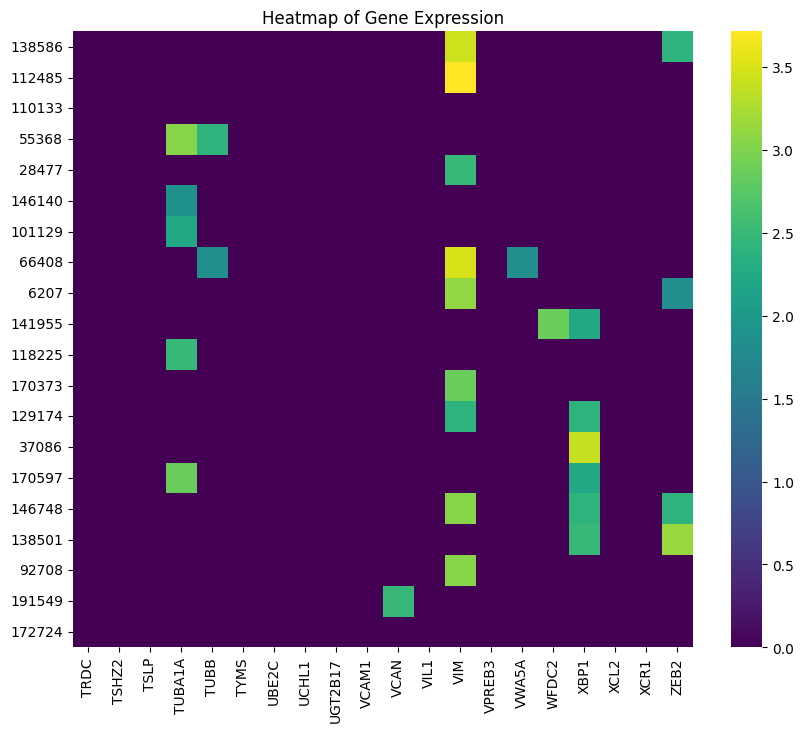

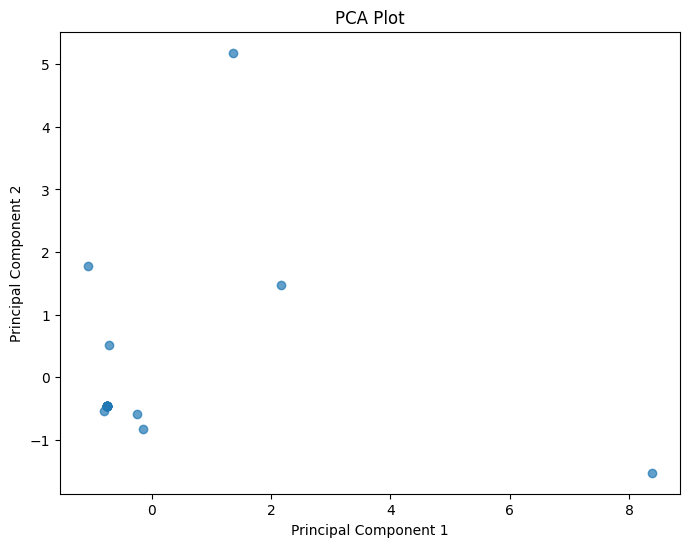

/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


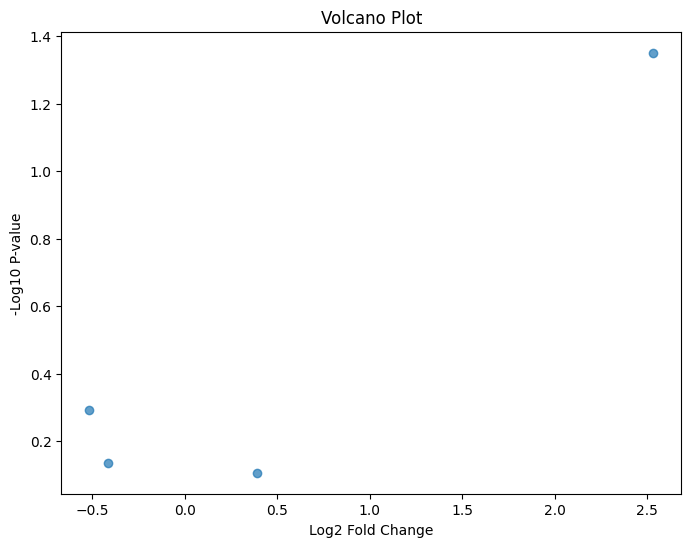

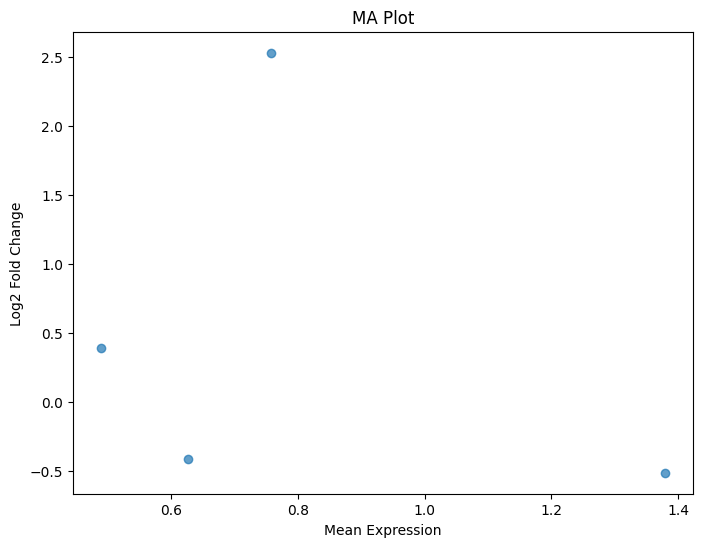

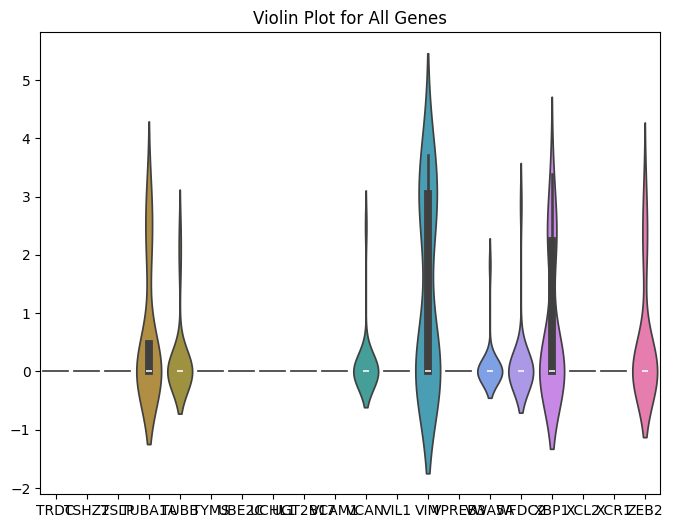

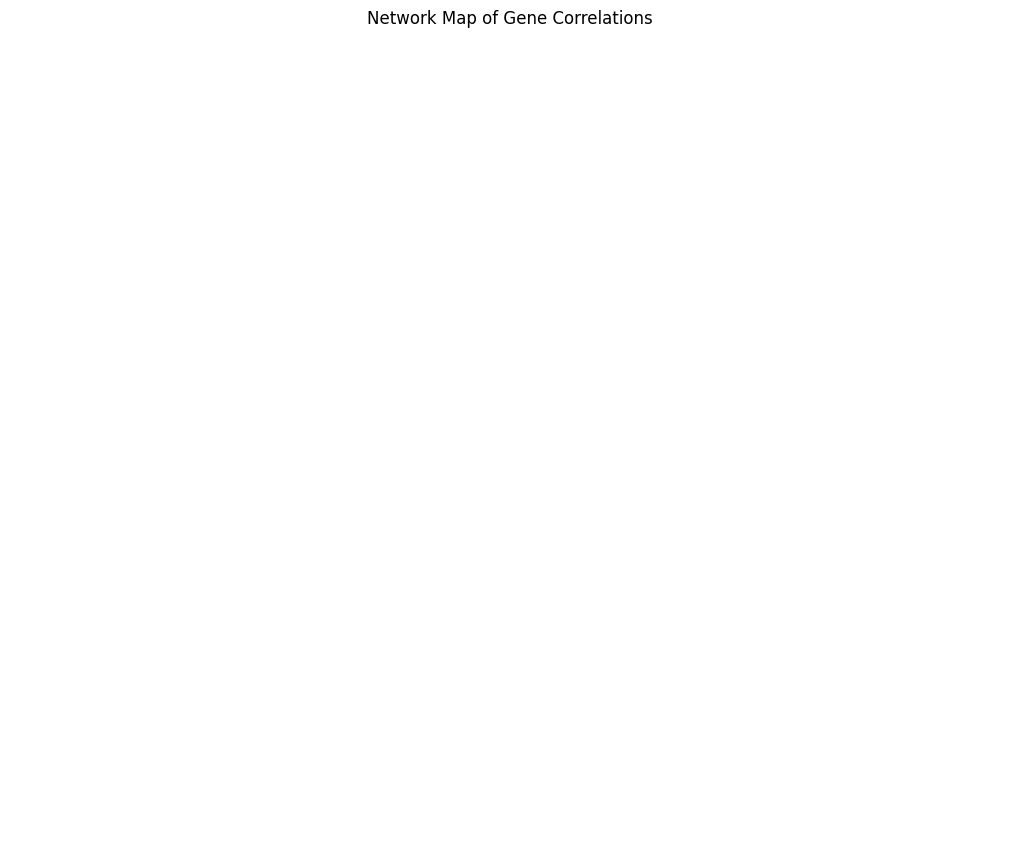

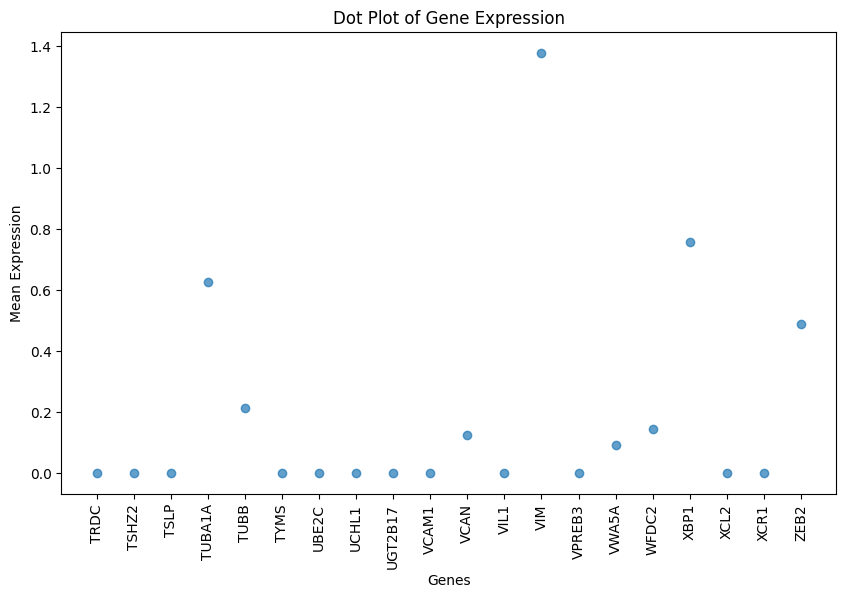

In [14]:
generate_bioinformatics_plots(df2)

## Analyze histology patch

In [15]:
%matplotlib inline

In [16]:
from analyze_histology_patches import analyze_histology_patches

In [17]:
import matplotlib.pyplot as plt

In [129]:
X_train.shape

(202534, 1024)

In [130]:
indices = np.random.permutation(len(X_train))[:10000]  # No array copy

In [131]:
X = X_train[indices]  

In [117]:
X = Y_train[indices]  

In [132]:
X_train.shape, X.shape

((202534, 1024), (10000, 1024))

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Optimal clusters: 7
Silhouette scores: {2: 0.07114774, 3: 0.13186784, 4: 0.12677144, 5: 0.12153683, 6: 0.17463961, 7: 0.19833641, 8: 0.17664813, 9: 0.19586806, 10: 0.19341926}


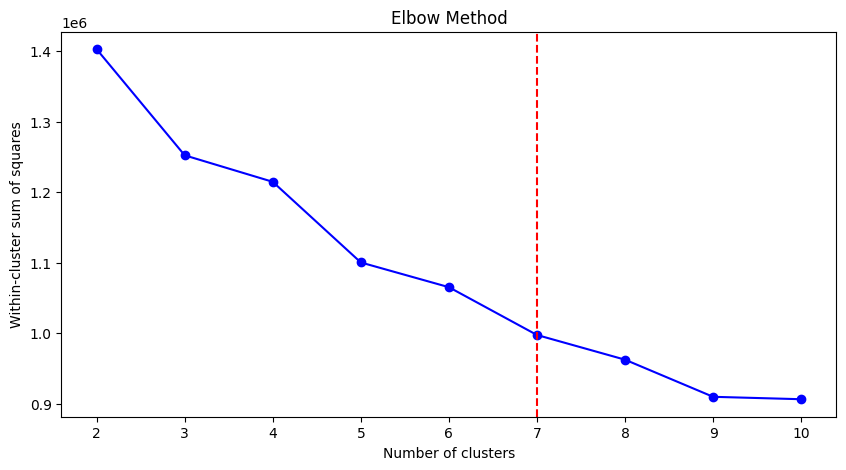

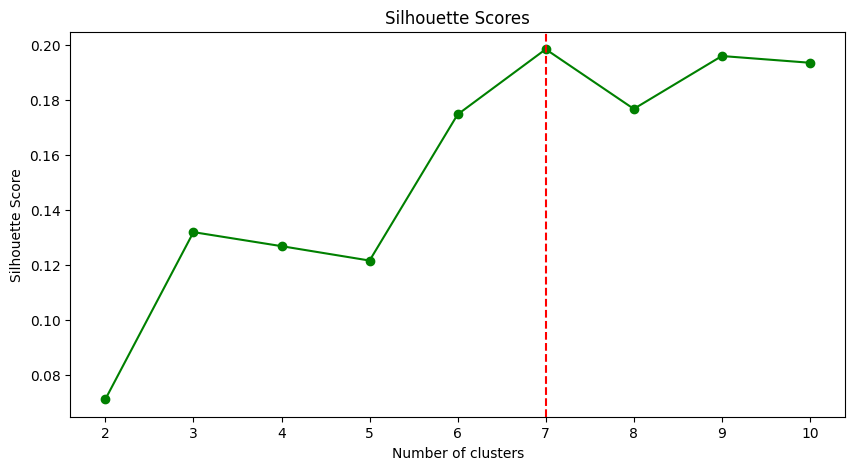

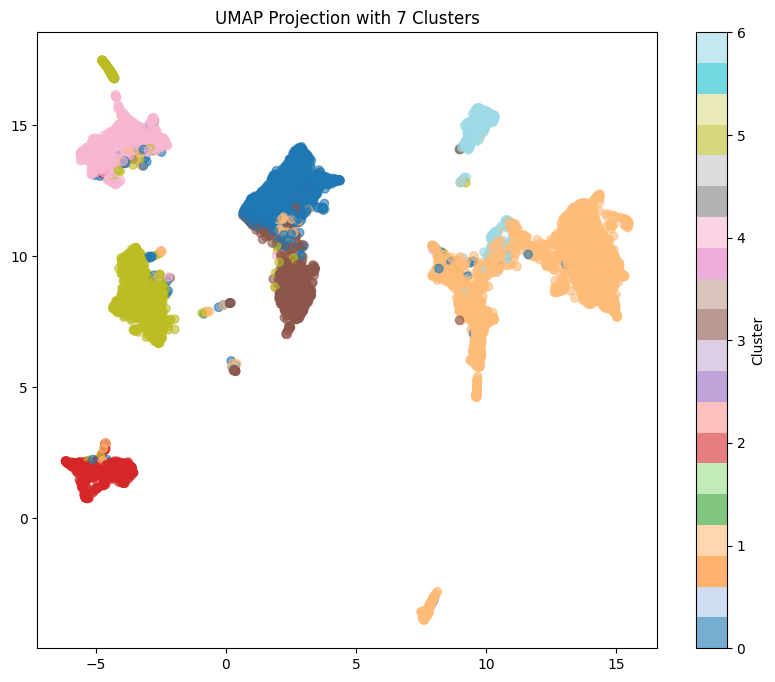

In [40]:
results = analyze_histology_patches(X_scaled)
print(f"Optimal clusters: {results['optimal_k']}")
print(f"Silhouette scores: {results['silhouette_scores']}")
# Save plots
for name, fig in results['plots'].items():
    display(fig)
    fig.savefig(f"{name}.png")
    plt.close(fig)

## Try some other stuff

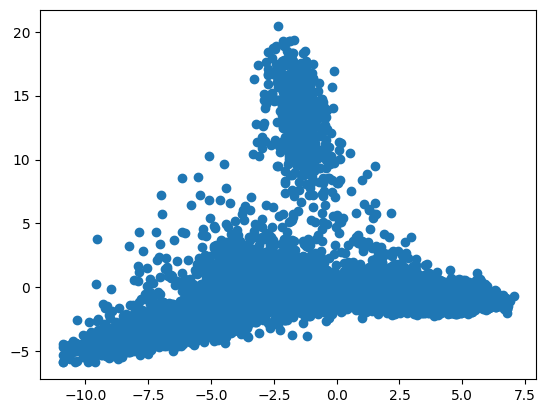

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
plt.scatter(reduced[:,0], reduced[:,1])

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

def cluster_stability(X, n_clusters=2, n_iter=10):
    agreements = []
    for _ in range(n_iter):
        km1 = KMeans(n_clusters=n_clusters).fit(X)
        km2 = KMeans(n_clusters=n_clusters).fit(X)
        agreements.append(adjusted_rand_score(km1.labels_, km2.labels_))
    return np.mean(agreements)

print(f"Stability Score: {cluster_stability(X_scaled, n_clusters=7)}")  # Should be >0.8


Stability Score: 0.6206514208434988


In [71]:
search = [(n,cluster_stability(X_scaled, n_clusters=n)) for n in range(1,15)]
search

[(1, 1.0),
 (2, 0.048620750991776665),
 (3, 0.4185979602045123),
 (4, 0.39806448715622883),
 (5, 0.4709745876232684),
 (6, 0.5403273687584675),
 (7, 0.5325652733058013),
 (8, 0.6718499396171331),
 (9, 0.7276707107450091),
 (10, 0.782637432415948),
 (11, 0.7602576438831428),
 (12, 0.7563605651051717),
 (13, 0.7534326454097171),
 (14, 0.7369268321312002)]

In [73]:
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import davies_bouldin_score

def evaluate_k(X, k):
    km = KMeans(n_clusters=k).fit(X)
    return {
        'stability': cluster_stability(X, k),
        'silhouette': silhouette_score(X, km.labels_),
        'davies_bouldin': davies_bouldin_score(X, km.labels_)
    }

metrics = [(k, evaluate_k(X_scaled, k)) for k in tqdm(range(2,15))]

metrics


%|                                                    | 0/13 [00:00<?, ?it/s]
%|███▍                                        | 1/13 [00:03<00:45,  3.83s/it]
%|██████▊                                     | 2/13 [00:07<00:43,  3.92s/it]
%|██████████▏                                 | 3/13 [00:12<00:40,  4.05s/it]
%|█████████████▌                              | 4/13 [00:16<00:37,  4.22s/it]
%|████████████████▉                           | 5/13 [00:21<00:34,  4.35s/it]
%|████████████████████▎                       | 6/13 [00:25<00:31,  4.50s/it]
%|███████████████████████▋                    | 7/13 [00:30<00:28,  4.68s/it]
%|███████████████████████████                 | 8/13 [00:36<00:24,  4.87s/it]
%|██████████████████████████████▍             | 9/13 [00:41<00:20,  5.06s/it]
%|█████████████████████████████████          | 10/13 [00:47<00:15,  5.29s/it]
%|████████████████████████████████████▍      | 11/13 [00:53<00:10,  5.49s/it]
%|███████████████████████████████████████▋   | 12/13 [00:59<00:

[(2,
  {'stability': 0.3145871671095225,
   'silhouette': 0.1049275,
   'davies_bouldin': 4.041665626574547}),
 (3,
  {'stability': 0.4916820882612563,
   'silhouette': 0.023487827,
   'davies_bouldin': 4.9398496208202545}),
 (4,
  {'stability': 0.4258212278885285,
   'silhouette': 0.03223155,
   'davies_bouldin': 3.508122443250466}),
 (5,
  {'stability': 0.4688331712178041,
   'silhouette': 0.03479935,
   'davies_bouldin': 3.893421050483515}),
 (6,
  {'stability': 0.3983345042756295,
   'silhouette': -0.008708222,
   'davies_bouldin': 4.057110404219416}),
 (7,
  {'stability': 0.7152855526195837,
   'silhouette': -0.004918623,
   'davies_bouldin': 4.623794328830704}),
 (8,
  {'stability': 0.6916708499905051,
   'silhouette': -0.0072042937,
   'davies_bouldin': 3.4829552949113336}),
 (9,
  {'stability': 0.6790978296129166,
   'silhouette': 0.008031532,
   'davies_bouldin': 3.5790718542532494}),
 (10,
  {'stability': 0.7479556480069667,
   'silhouette': -0.004434529,
   'davies_bouldin':

In [74]:
# Replace PCA with UMAP for non-linear reduction
import umap
reducer = umap.UMAP(n_components=15)
X_umap = reducer.fit_transform(X_scaled)
metrics = [(k, evaluate_k(X_umap, k)) for k in tqdm(range(2,15))]
metrics

/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(

%|                                                    | 0/13 [00:00<?, ?it/s]
%|███▍                                        | 1/13 [00:02<00:35,  2.99s/it]
%|██████▊                                     | 2/13 [00:05<00:32,  2.97s/it]
%|██████████▏                                 | 3/13 [00:09<00:30,  3.02s/it]
%|█████████████▌                              | 4/13 [00:12<00:27,  3.04s/it]
%|████████████████▉                           | 5/13 [00:15<00:24,  3.05s/it]
%|████████████████████▎                       | 6/13 [00:18<00:21,  3.05s/it]
%|███████████████████████▋                    | 7/13 [00:21<00:18,  3.05s/it]
%|███████████████████████████                 | 8/13 [00:24<00:15,  3.06s/it]
%|██████████████████████████████▍             | 9/13 [00:27<00:12,  3.07s/it]
%|██████████████████████████

[(2,
  {'stability': 0.45919965056325773,
   'silhouette': 0.45216084,
   'davies_bouldin': 0.9922601445079084}),
 (3,
  {'stability': 0.8684812653770585,
   'silhouette': 0.5099463,
   'davies_bouldin': 0.7576824331759852}),
 (4,
  {'stability': 0.9013859517033502,
   'silhouette': 0.5869572,
   'davies_bouldin': 0.5843670258016525}),
 (5,
  {'stability': 0.8923252444579619,
   'silhouette': 0.5773007,
   'davies_bouldin': 0.5449521788823922}),
 (6,
  {'stability': 0.7783431995174779,
   'silhouette': 0.5403026,
   'davies_bouldin': 0.6992109539328181}),
 (7,
  {'stability': 0.7524732014910342,
   'silhouette': 0.48646486,
   'davies_bouldin': 0.6916631494930174}),
 (8,
  {'stability': 0.8457065045948106,
   'silhouette': 0.5432621,
   'davies_bouldin': 0.591660632962763}),
 (9,
  {'stability': 0.8910507139633334,
   'silhouette': 0.5532879,
   'davies_bouldin': 0.6106677806163471}),
 (10,
  {'stability': 0.8349416693565823,
   'silhouette': 0.47922447,
   'davies_bouldin': 0.77654399

In [75]:
kmeans = KMeans(n_clusters=4, n_init=50).fit(X_umap)

In [ ]:
from scipy.stats import kruskal
for gene in range(X_scaled.shape[1]):
    _, p = kruskal(*[X_scaled[kmeans.labels_==i, gene] for i in range(4)])
    if p < 0.001: print(f"Gene {gene} significant (p={p:.2e})")

In [78]:
from sklearn.cluster import AgglomerativeClustering
models = [
    KMeans(n_clusters=4),
    AgglomerativeClustering(n_clusters=4)
]
consensus = np.mean([m.fit_predict(X_umap) for m in models], axis=0)


Number of points with strong agreement: 2909
Number of points with disagreement: 7091


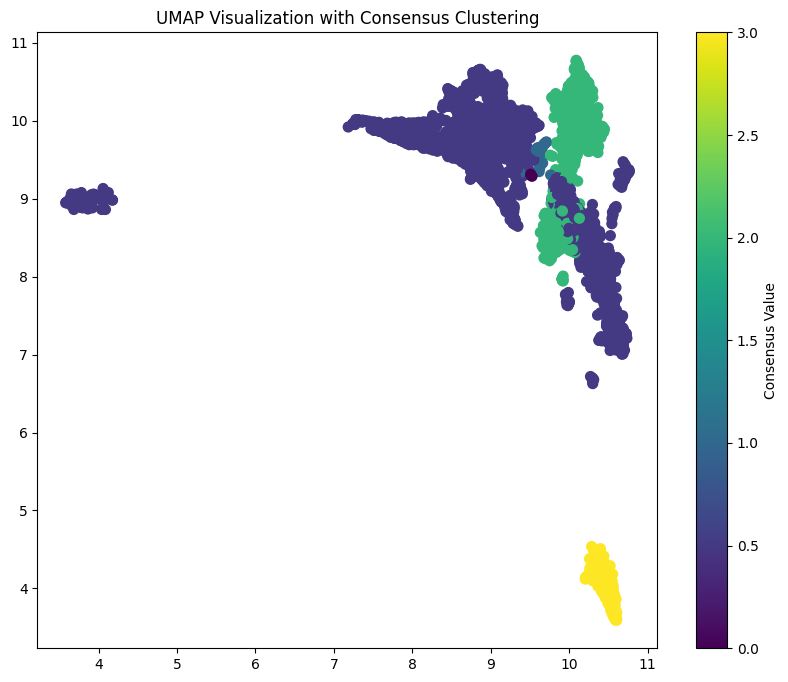

In [82]:
# Find indices where both algorithms agree
strong_agreement_indices = np.where(np.isin(consensus, [0, 1, 2, 3]))[0]
print(f"Number of points with strong agreement: {len(strong_agreement_indices)}")
# Find indices where algorithms disagree
disagreement_indices = np.where(np.isin(consensus, [0.5]))[0]
print(f"Number of points with disagreement: {len(disagreement_indices)}")
import matplotlib.pyplot as plt
import umap
import numpy as np

# Ensure X_umap is defined
if 'X_umap' not in locals():
    # Assuming X_scaled is your data
    reducer = umap.UMAP(n_components=2)
    X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=consensus, cmap='viridis', s=50)
plt.colorbar(label='Consensus Value')
plt.title('UMAP Visualization with Consensus Clustering')
plt.show()


## And again

Processing PCA...
Processing UMAP...
Method: PCA
  MSE: 0.8561
  Time: 0.0690 seconds
Method: UMAP
  MSE: 1.2846
  Time: 11.3641 seconds


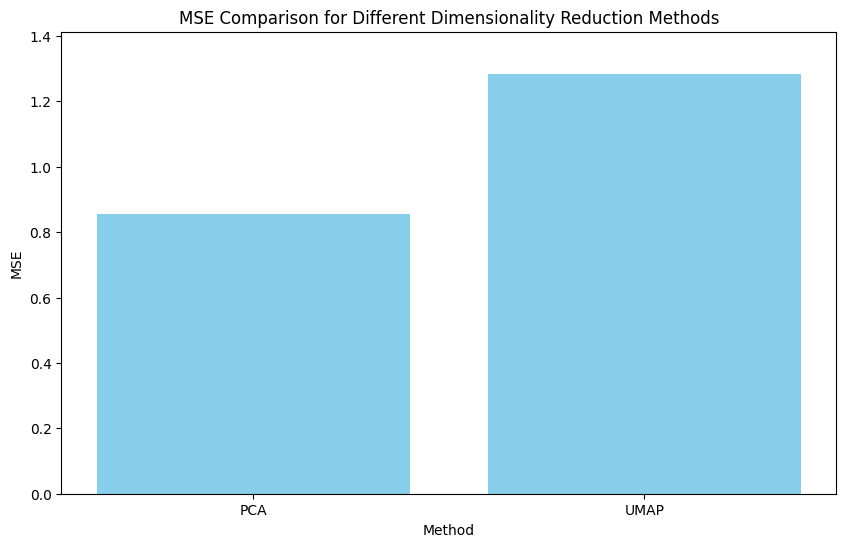

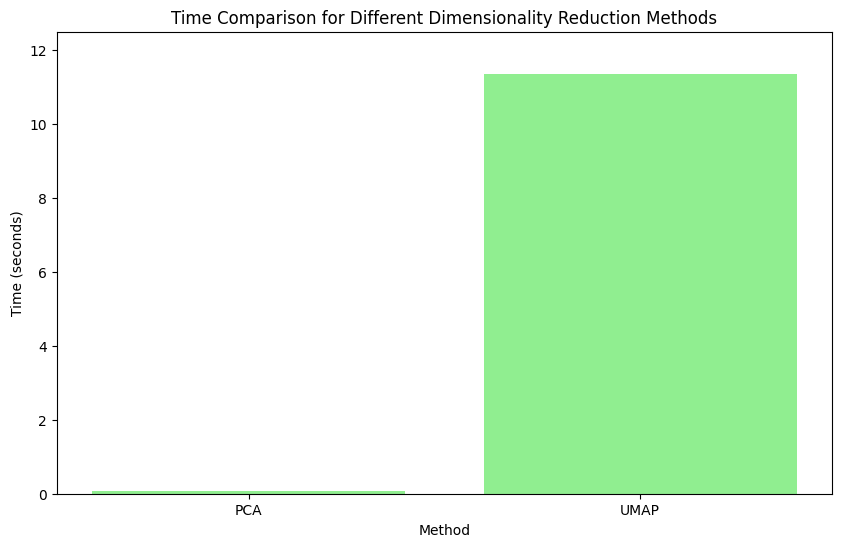

In [90]:
import numpy as np
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import time

# Assuming X is your standardized 10000 x 460 matrix
X = X_scaled

# Split data into training and test sets
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2)

n_components = 15  # Number of components for most methods

methods = {
    "PCA": PCA(n_components=8),
    "UMAP": umap.UMAP(n_components=4),
}

results = {}

for name, method in methods.items():
    print(f"Processing {name}...")
    start_time = time.time()
    
    try:
        # Fit and transform the training data
        X_reduced_train = method.fit_transform(X_train)
        
        # Transform the test data
        if name == "t-SNE":
            # t-SNE doesn't have a transform method for new data
            X_reduced_test = TSNE(n_components=tsne_components, method='exact', 
                                 random_state=42, n_iter=250).fit_transform(X_test)
        else:
            X_reduced_test = method.transform(X_test)
        
        end_time = time.time()
        
        # Reconstruct the data (approximate inverse transform)
        if name == "UMAP":
            # UMAP doesn't have a direct inverse transform, so use Nearest Neighbors
            nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
            nn.fit(X_reduced_train)  # Train on reduced training data
            distances, indices = nn.kneighbors(X_reduced_test)
            # Find the original high-dimensional points corresponding to the reduced points
            X_reconstructed = X_train[indices.flatten()].reshape(X_test.shape)
        elif name == "t-SNE":
            # t-SNE doesn't have an inverse transform
            X_reconstructed = X_test
        else:
            X_reconstructed = method.inverse_transform(X_reduced_test)
        
        # Calculate MSE
        mse = mean_squared_error(X_test, X_reconstructed)
        
        results[name] = {
            "MSE": mse,
            "Time": end_time - start_time
        }
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results[name] = {
            "MSE": float('nan'),
            "Time": float('nan')
        }

# Print Results
for name, result in results.items():
    print(f"Method: {name}")
    print(f"  MSE: {result['MSE']:.4f}")
    print(f"  Time: {result['Time']:.4f} seconds")

# Filter out methods with NaN MSE for plotting
valid_results = {k: v for k, v in results.items() if not np.isnan(v["MSE"])}

if valid_results:
    # Bar plot for MSE
    names = list(valid_results.keys())
    mse_values = [result['MSE'] for result in valid_results.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(names, mse_values, color='skyblue')
    plt.xlabel('Method')
    plt.ylabel('MSE')
    plt.title('MSE Comparison for Different Dimensionality Reduction Methods')
    plt.ylim(0, max(mse_values) * 1.1)  # Adjust y-axis limit
    plt.show()

    # Bar plot for time
    time_values = [result['Time'] for result in valid_results.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(names, time_values, color='lightgreen')
    plt.xlabel('Method')
    plt.ylabel('Time (seconds)')
    plt.title('Time Comparison for Different Dimensionality Reduction Methods')
    plt.ylim(0, max(time_values) * 1.1)  # Adjust y-axis limit
    plt.show()
else:
    print("No valid results to plot.")


In [93]:
from visualize_pca_clusters import visualize_pca_clusters

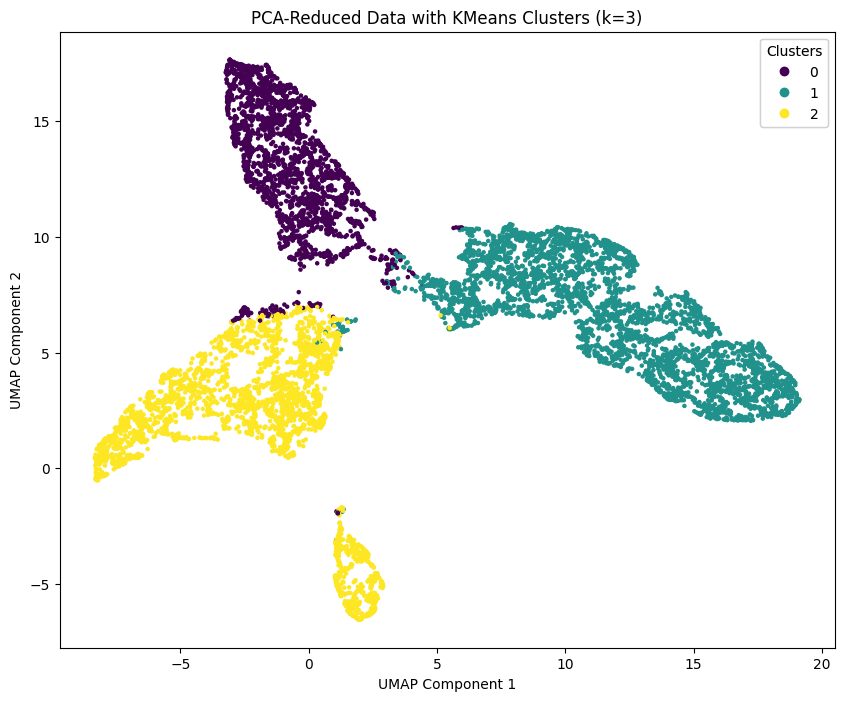

In [99]:
# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
visualize_pca_clusters(X_scaled, n_components=3)

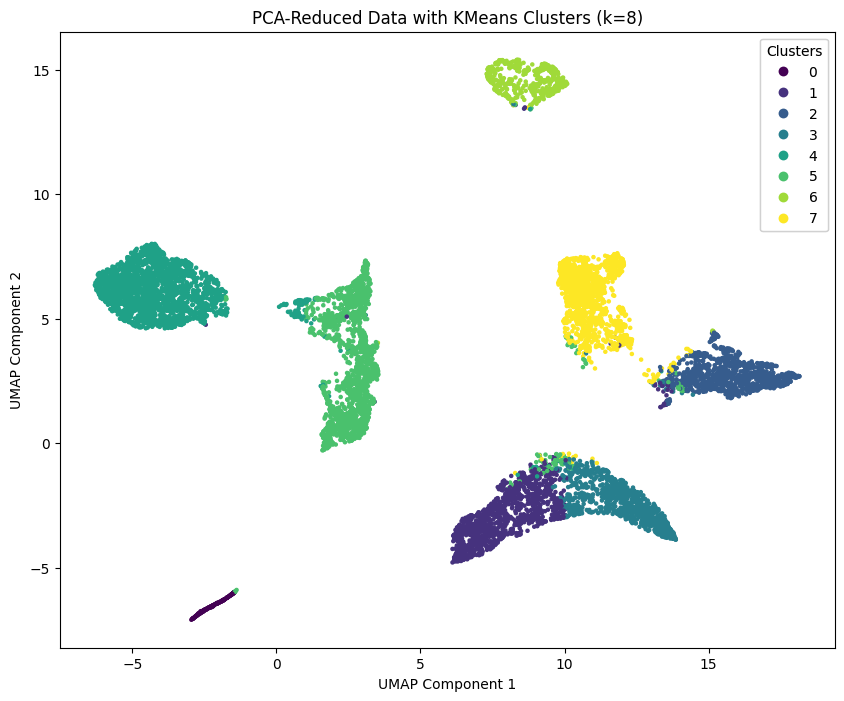

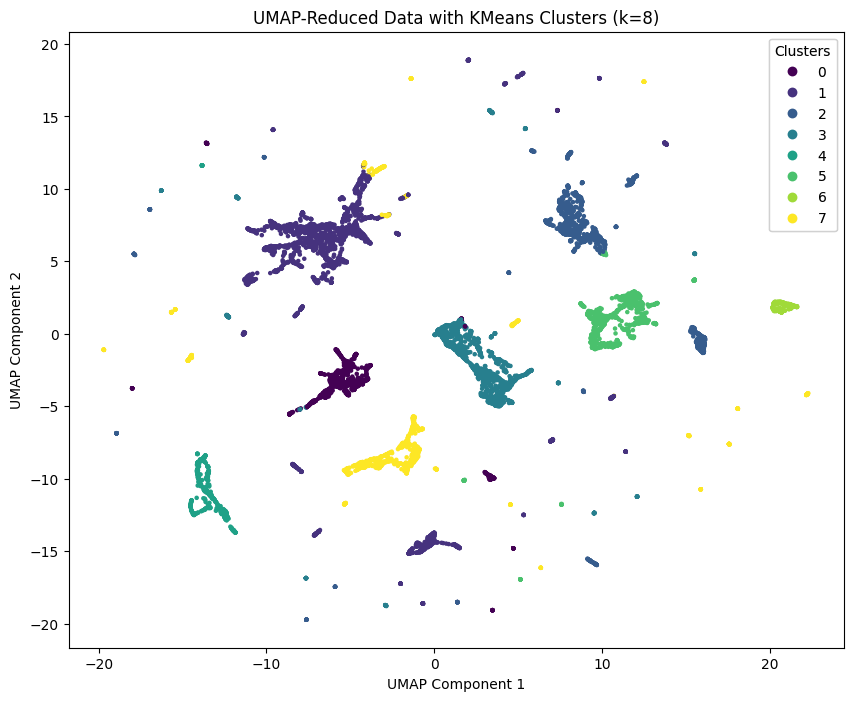

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap  # Import UMAP

def visualize_clusters(X, n_components, method='pca'):
    """
    Applies either PCA or UMAP for initial dimension reduction, then KMeans clustering,
    and visualizes the results using UMAP for 2D projection.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components and clusters to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.
    """
    if method == 'pca':
        # Apply PCA
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        # Apply UMAP for initial dimension reduction
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Visualize using UMAP for 2D projection
    reducer_umap = umap.UMAP(n_components=2)
    X_umap = reducer_umap.fit_transform(X_reduced)

    # Create a scatter plot of the reduced data, colored by cluster labels
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
    plt.title(f'{method.upper()}-Reduced Data with KMeans Clusters (k={n_components})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                         loc="upper right", title="Clusters")
    plt.gca().add_artist(legend1)

    plt.show()

# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
visualize_clusters(X_scaled, n_components=8, method='pca')
visualize_clusters(X_scaled, n_components=8, method='umap')


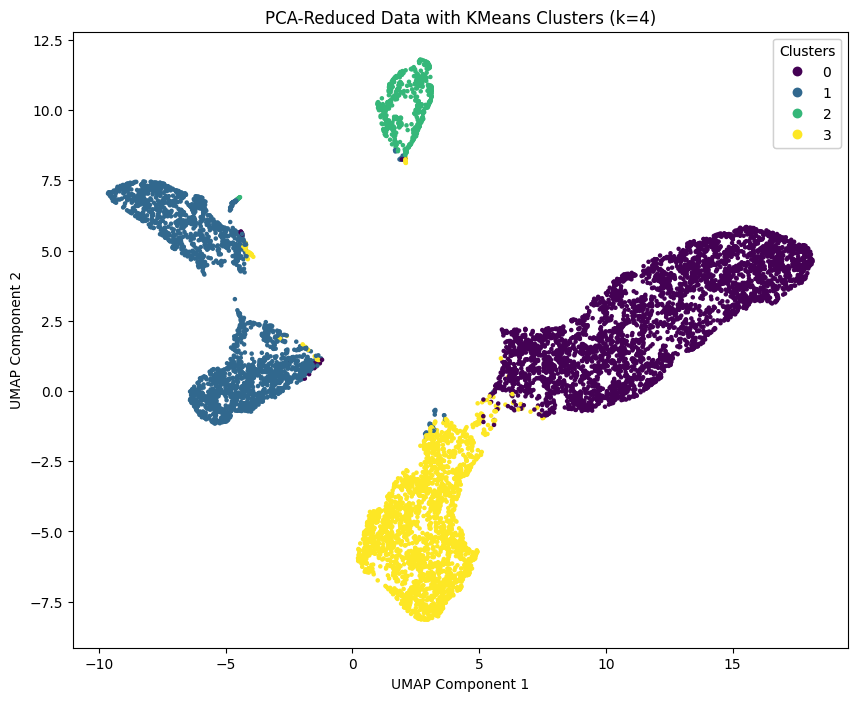

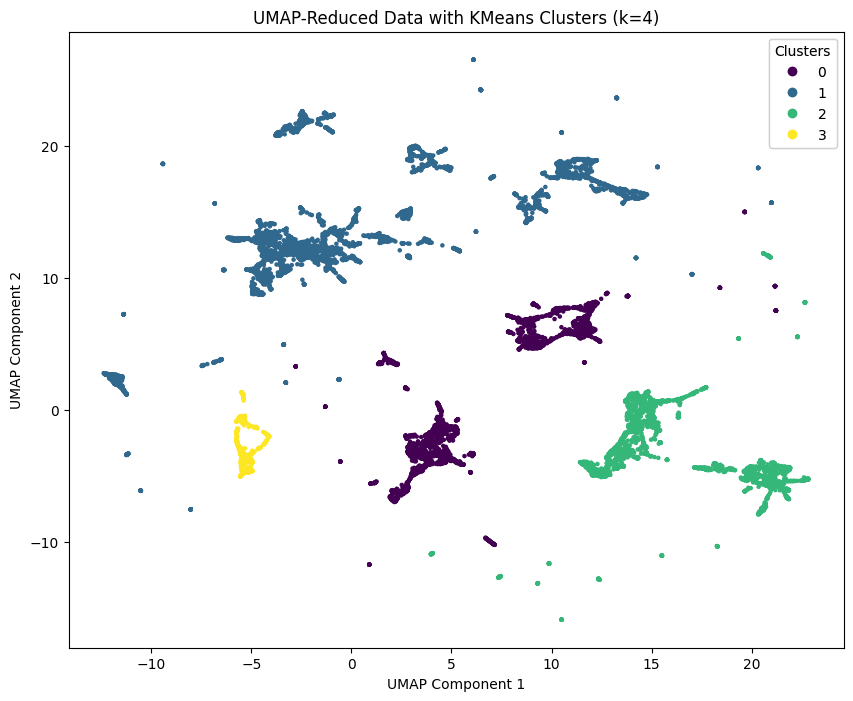

In [101]:
visualize_clusters(X_scaled, n_components=4, method='pca')
visualize_clusters(X_scaled, n_components=4, method='umap')


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


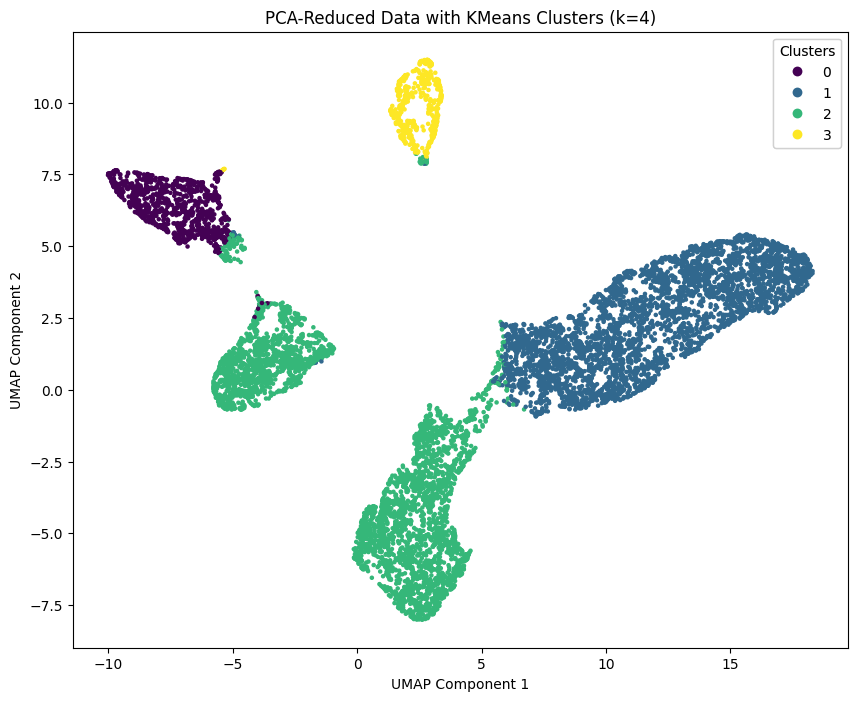

/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


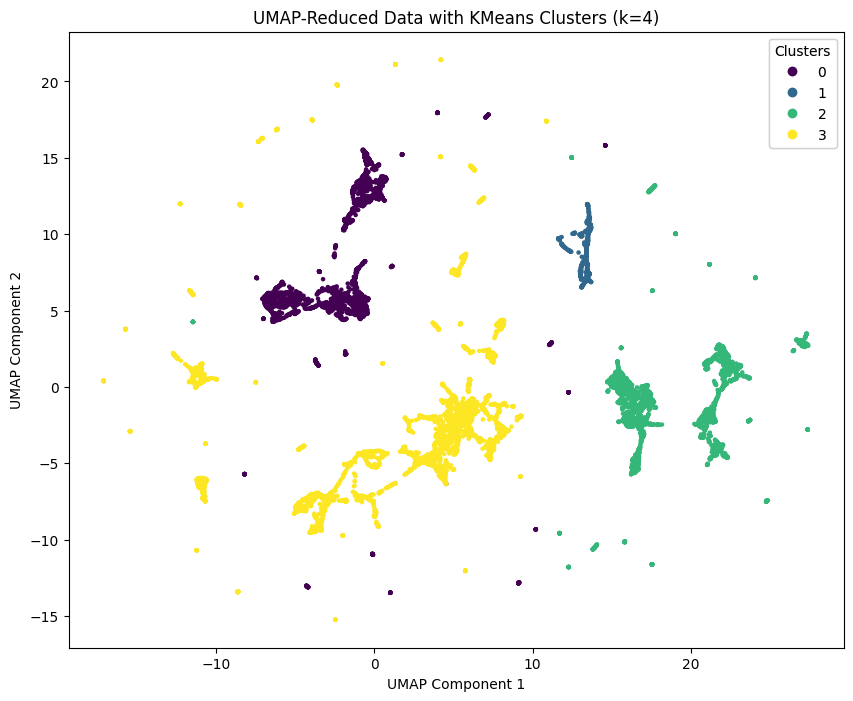

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap  # Import UMAP

def visualize_clusters(X, n_components, method='pca'):
    """
    Applies either PCA or UMAP for initial dimension reduction, then KMeans clustering,
    and visualizes the results using UMAP for 2D projection.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components and clusters to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.
    """
    if method == 'pca':
        # Apply PCA
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        # Apply UMAP for initial dimension reduction
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Visualize using UMAP for 2D projection
    reducer_umap = umap.UMAP(n_components=2)
    X_umap = reducer_umap.fit_transform(X_reduced)

    # Create a scatter plot of the reduced data, colored by cluster labels
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
    plt.title(f'{method.upper()}-Reduced Data with KMeans Clusters (k={n_components})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                         loc="upper right", title="Clusters")
    plt.gca().add_artist(legend1)

    plt.show()

# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
visualize_clusters(X_scaled, n_components=4, method='pca')
visualize_clusters(X_scaled, n_components=4, method='umap')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap  # Import UMAP
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection

def visualize_clusters(X, n_components, method='pca'):
    """
    Applies either PCA or UMAP for initial dimension reduction, then KMeans clustering,
    and visualizes the results using UMAP for 2D projection.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.
    """
    
    # Dimension Reduction Step
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'random_projection':
        reducer = GaussianRandomProjection(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca', 'umap', or 'random_projection'")

    # Clustering Step (KMeans)
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)
    
    # Visualization Step (UMAP)
    reducer_umap = umap.UMAP(n_components=2)
    X_umap = reducer_umap.fit_transform(X_reduced)

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
    plt.title(f'{method.upper()}-Reduced Data with KMeans Clusters (k={n_components})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(label='Cluster')  # Add colorbar for better interpretation

    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                         loc="upper right", title="Clusters")
    plt.gca().add_artist(legend1)

    plt.show()


# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
X = X_scaled

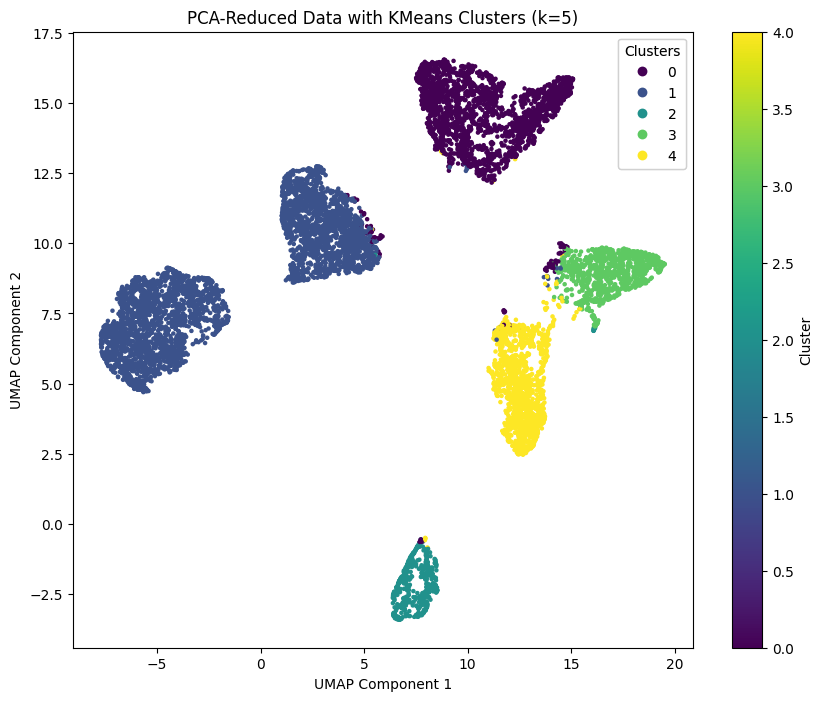

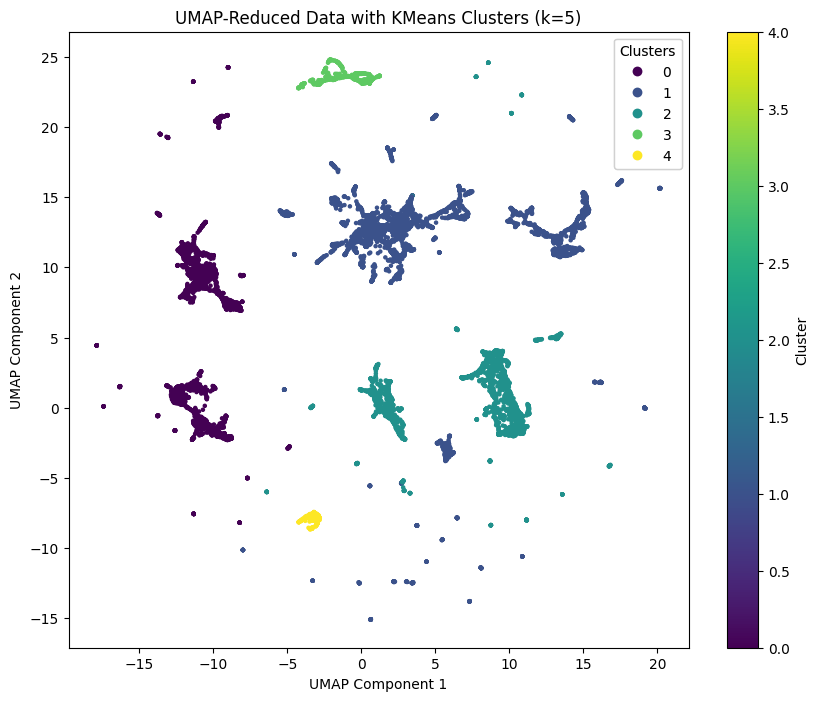

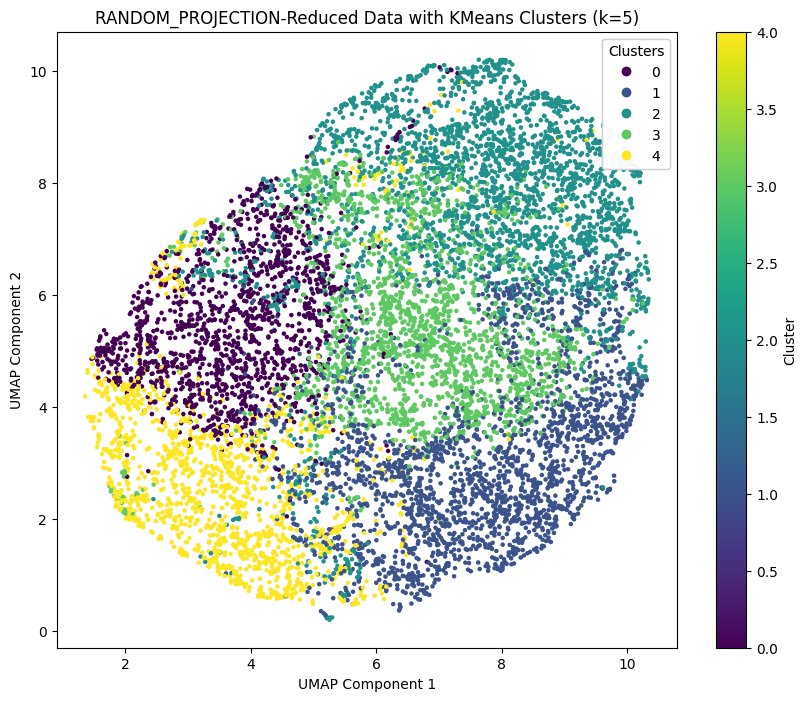

In [106]:
# You can now test each visualization method, and pick different numbers of principle components (10)
n_components=5
visualize_clusters(X, n_components=n_components, method='pca')
visualize_clusters(X, n_components=n_components, method='umap')
visualize_clusters(X, n_components=n_components, method='random_projection')

## PCA k=6 for 460 gene data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap  # Import UMAP
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

def evaluate_clustering(X, n_components, method='pca'):
    """
    Applies either PCA or UMAP for initial dimension reduction, then KMeans clustering,
    and calculates Silhouette Score and Davies-Bouldin Index.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.

    Returns:
        dict: A dictionary containing Silhouette Score and Davies-Bouldin Index.
    """
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Evaluate clustering
    silhouette = silhouette_score(X_reduced, cluster_labels)
    db_index = davies_bouldin_score(X_reduced, cluster_labels)

    return {'Silhouette Score': silhouette, 'Davies-Bouldin Index': db_index, 'cluster_labels': cluster_labels, 'X_reduced': X_reduced}

In [144]:
def visualize_clusters(X, n_components, method='pca'):
    """
    Visualizes clusters after applying either PCA or UMAP for initial dimension reduction,
    then KMeans clustering. Adds centroid labels.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.
    """
    # Evaluate clustering to get cluster labels and reduced data
    eval_results = evaluate_clustering(X, n_components, method)
    cluster_labels = eval_results['cluster_labels']
    X_reduced = eval_results['X_reduced']
    
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Visualize using UMAP for 2D projection
    reducer_umap = umap.UMAP(n_components=2)
    X_umap = reducer_umap.fit_transform(X_reduced)

    # Calculate centroids
    centroids = []
    for i in range(n_components):
        centroids.append(np.mean(X_umap[cluster_labels == i], axis=0))
    centroids = np.array(centroids)

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
    plt.title(f'{method.upper()}-Reduced Data with KMeans Clusters (k={n_components})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.colorbar(label='Cluster')  # Add colorbar for better interpretation
    
    # Add centroid labels
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], str(i + 1), color='magenta', fontsize=16, ha='center', va='center', weight='bold')
        
    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
    plt.gca().add_artist(legend1)

    plt.show()

Method: pca, Components: 2, Silhouette Score: 0.5285, Davies-Bouldin Index: 0.6889
Method: pca, Components: 3, Silhouette Score: 0.4836, Davies-Bouldin Index: 0.7763
Method: pca, Components: 4, Silhouette Score: 0.5146, Davies-Bouldin Index: 0.7875
Method: pca, Components: 5, Silhouette Score: 0.5146, Davies-Bouldin Index: 0.7146
Method: pca, Components: 6, Silhouette Score: 0.5171, Davies-Bouldin Index: 0.7937
Method: pca, Components: 7, Silhouette Score: 0.5139, Davies-Bouldin Index: 0.7486
Method: pca, Components: 8, Silhouette Score: 0.4941, Davies-Bouldin Index: 0.7911
Method: pca, Components: 9, Silhouette Score: 0.4983, Davies-Bouldin Index: 0.7566
Method: pca, Components: 10, Silhouette Score: 0.4945, Davies-Bouldin Index: 0.7547


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 2, Silhouette Score: 0.4791, Davies-Bouldin Index: 0.8689


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 3, Silhouette Score: 0.5198, Davies-Bouldin Index: 0.7873


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 4, Silhouette Score: 0.5789, Davies-Bouldin Index: 0.5837


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 5, Silhouette Score: 0.6063, Davies-Bouldin Index: 0.5042


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 6, Silhouette Score: 0.5506, Davies-Bouldin Index: 0.6054


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 7, Silhouette Score: 0.5305, Davies-Bouldin Index: 0.6006


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 8, Silhouette Score: 0.5434, Davies-Bouldin Index: 0.5869


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 9, Silhouette Score: 0.5509, Davies-Bouldin Index: 0.6133


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Method: umap, Components: 10, Silhouette Score: 0.4997, Davies-Bouldin Index: 0.7323
Best Method: umap, Best Components: 5


/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


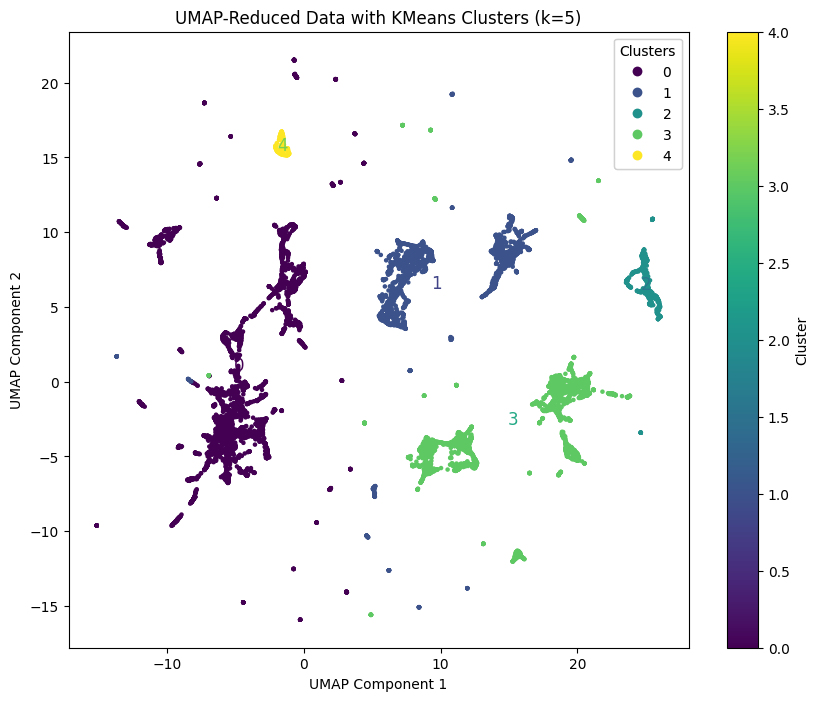

In [ ]:
# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
X = X_scaled

# Evaluate different methods and number of components
results = {}
for method in ['pca', 'umap']:
    results[method] = {}
    for n_components in range(2, 11):  # Test from 2 to 10 components
        metrics = evaluate_clustering(X, n_components, method=method)
        results[method][n_components] = metrics
        print(f"Method: {method}, Components: {n_components}, Silhouette Score: {metrics['Silhouette Score']:.4f}, Davies-Bouldin Index: {metrics['Davies-Bouldin Index']:.4f}")

# Visualize the best result based on Silhouette Score (you can change this to Davies-Bouldin Index)
best_method = max(results, key=lambda m: max(results[m], key=lambda k: results[m][k]['Silhouette Score']))
best_n_components = max(results[best_method], key=lambda k: results[best_method][k]['Silhouette Score'])

print(f"Best Method: {best_method}, Best Components: {best_n_components}")
visualize_clusters(X, n_components=best_n_components, method=best_method)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap  # Import UMAP
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

def evaluate_clustering(X, n_components, method='pca'):
    """
    Applies either PCA or UMAP for initial dimension reduction, then KMeans clustering,
    and calculates Silhouette Score and Davies-Bouldin Index.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.

    Returns:
        dict: A dictionary containing Silhouette Score and Davies-Bouldin Index.
    """
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Evaluate clustering
    silhouette = silhouette_score(X_reduced, cluster_labels)
    db_index = davies_bouldin_score(X_reduced, cluster_labels)

    return {'Silhouette Score': silhouette, 'Davies-Bouldin Index': db_index, 'cluster_labels': cluster_labels, 'X_reduced': X_reduced}

def visualize_clusters(X, n_components, method='pca', ax=None):
    """
    Visualizes clusters after applying either PCA or UMAP for initial dimension reduction,
    then KMeans clustering. Adds centroid labels.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.
        ax (matplotlib.axes._axes.Axes, optional): The axes object to draw the plot onto. If None, creates a new figure and axes.
    """
    # Evaluate clustering to get cluster labels and reduced data
    eval_results = evaluate_clustering(X, n_components, method)
    cluster_labels = eval_results['cluster_labels']
    X_reduced = eval_results['X_reduced']
    silhouette = eval_results['Silhouette Score']
    db_index = eval_results['Davies-Bouldin Index']
    
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Visualize using UMAP for 2D projection
    reducer_umap = umap.UMAP(n_components=2)
    X_umap = reducer_umap.fit_transform(X_reduced)

    # Calculate centroids
    centroids = []
    for i in range(n_components):
        centroids.append(np.mean(X_umap[cluster_labels == i], axis=0))
    centroids = np.array(centroids)

    # Plotting
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
    ax.set_title(f'{method.upper()} (k={n_components})\nSilhouette={silhouette:.2f}, DBIndex={db_index:.2f}')
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    
    # Add centroid labels
    for i, centroid in enumerate(centroids):
        ax.text(centroid[0], centroid[1], str(i), color=plt.cm.viridis(i/n_components), fontsize=12, ha='center', va='center')

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
    ax.add_artist(legend1)

/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/catskills/Desktop/broad/broad/lib/pytho

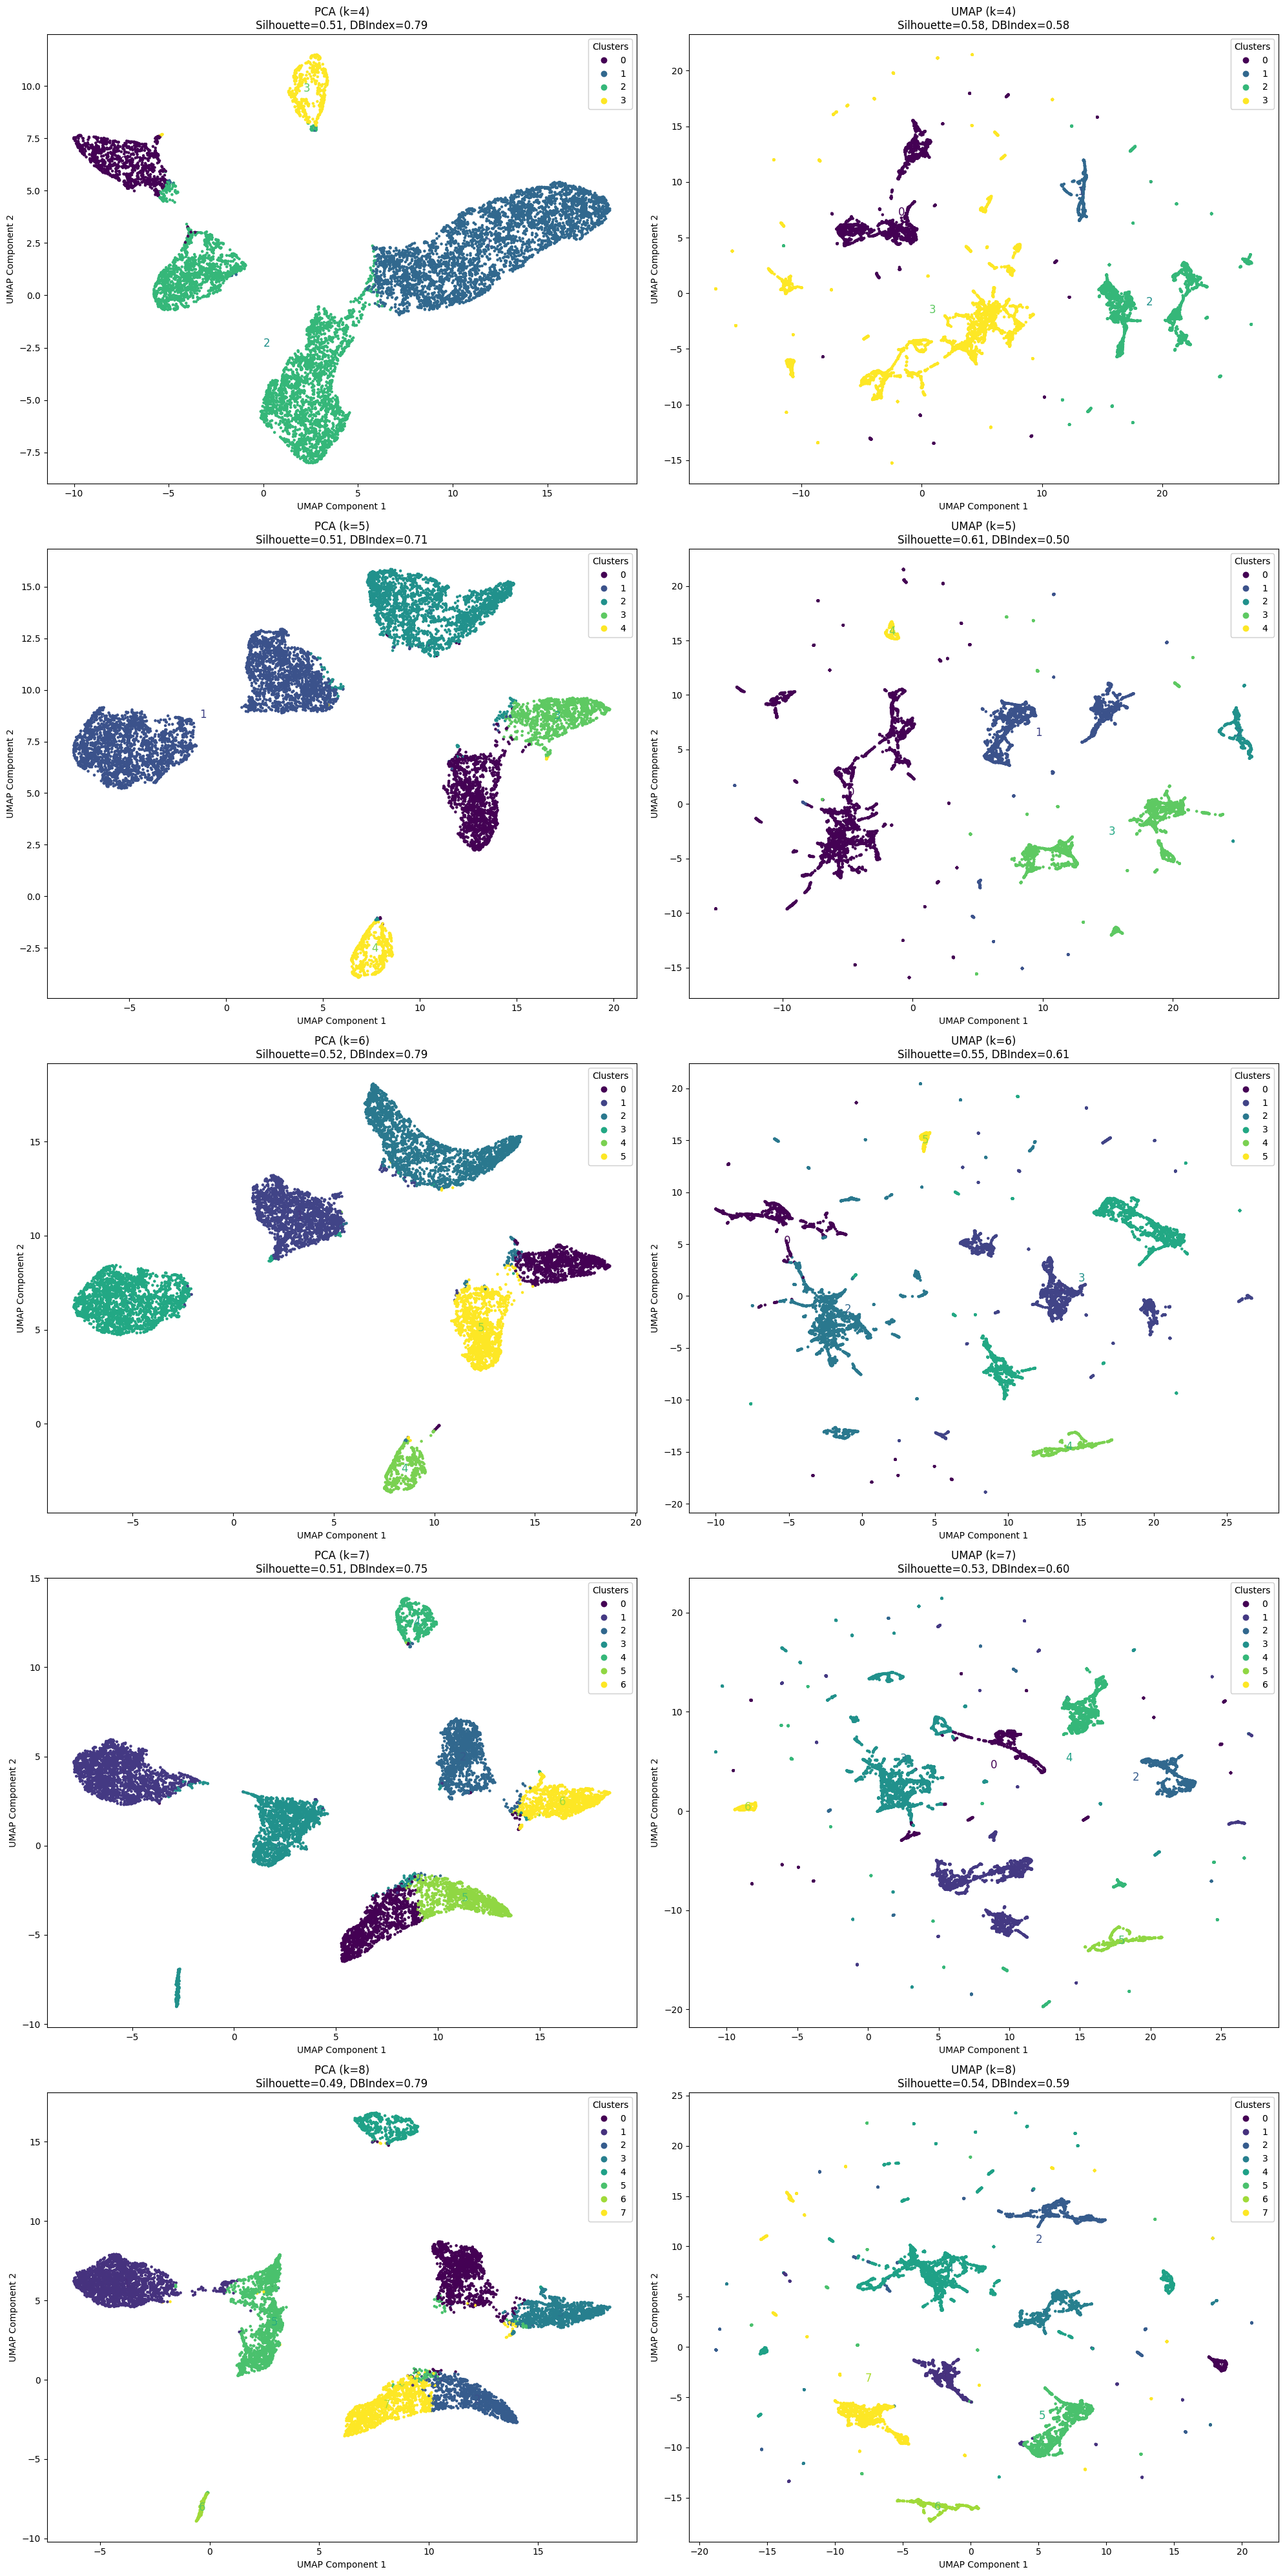

In [110]:
# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
X = X_scaled

# Define the range of n_components to test
n_components_range = range(4, 9)  # From 4 to 8

# Create a figure with subplots for each n_components
fig, axes = plt.subplots(len(n_components_range), 2, figsize=(20, 8 * len(n_components_range)))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop over each n_components and visualize PCA and UMAP side by side
for i, n_components in enumerate(n_components_range):
    visualize_clusters(X, n_components=n_components, method='pca', ax=axes[2*i])
    visualize_clusters(X, n_components=n_components, method='umap', ax=axes[2*i + 1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap  # Import UMAP
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

def evaluate_clustering(X, n_components, method='pca'):
    """
    Applies either PCA or UMAP for initial dimension reduction, then KMeans clustering,
    and calculates Silhouette Score and Davies-Bouldin Index.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.

    Returns:
        dict: A dictionary containing Silhouette Score and Davies-Bouldin Index.
    """
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Evaluate clustering
    silhouette = silhouette_score(X_reduced, cluster_labels)
    db_index = davies_bouldin_score(X_reduced, cluster_labels)

    return {'Silhouette Score': silhouette, 'Davies-Bouldin Index': db_index, 'cluster_labels': cluster_labels, 'X_reduced': X_reduced}

def visualize_clusters(X, n_components, method='pca'):
    """
    Visualizes clusters after applying either PCA or UMAP for initial dimension reduction,
    then KMeans clustering. Adds centroid labels.

    Args:
        X (np.ndarray): Standardized data matrix (samples x features).
        n_components (int): Number of components to use.
        method (str): 'pca' or 'umap', specifying the dimension reduction method.
    """
    # Evaluate clustering to get cluster labels and reduced data
    eval_results = evaluate_clustering(X, n_components, method)
    cluster_labels = eval_results['cluster_labels']
    X_reduced = eval_results['X_reduced']
    silhouette = eval_results['Silhouette Score']
    db_index = eval_results['Davies-Bouldin Index']
    
    if method == 'pca':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=n_components)
        X_reduced = reducer.fit_transform(X)
    else:
        raise ValueError("Method must be 'pca' or 'umap'")

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=n_components, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)

    # Visualize using UMAP for 2D projection
    reducer_umap = umap.UMAP(n_components=2)
    X_umap = reducer_umap.fit_transform(X_reduced)

    # Calculate centroids
    centroids = []
    for i in range(n_components):
        centroids.append(np.mean(X_umap[cluster_labels == i], axis=0))
    centroids = np.array(centroids)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 10))  # Increased figure size for better readability
    scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=cluster_labels, cmap='viridis', s=5)
    ax.set_title(f'{method.upper()} (k={n_components})\nSilhouette={silhouette:.2f}, DBIndex={db_index:.2f}', fontsize=14)  # Increased fontsize for title
    ax.set_xlabel('UMAP Component 1', fontsize=12)  # Increased fontsize for labels
    ax.set_ylabel('UMAP Component 2', fontsize=12)
    
    # Add centroid labels
    for i, centroid in enumerate(centroids):
        ax.text(centroid[0], centroid[1], str(i + 1), color='magenta', fontsize=18, ha='center', va='center', weight='bold')

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
    ax.add_artist(legend1)

    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

In [ ]:
# Example usage:
# Assuming X_scaled is your standardized 10000 x 460 matrix
X = X_scaled

# Define the range of n_components to test
n_components_range = range(4, 9)  # From 4 to 8

# Loop over each n_components and visualize PCA and UMAP separately
for n_components in n_components_range:
    print(f"Plotting for n_components = {n_components}...")
    visualize_clusters(X, n_components=n_components, method='pca')
    visualize_clusters(X, n_components=n_components, method='umap')

## PCA final decision for patch 1024 feature vectors

In [133]:
X.shape

(10000, 1024)

In [134]:
X_scaled = scaler.fit_transform(X)

In [149]:
X_scaled.shape

(10000, 1024)

In [150]:
X = X_scaled[0:1000]

Plotting for n_components = 2...


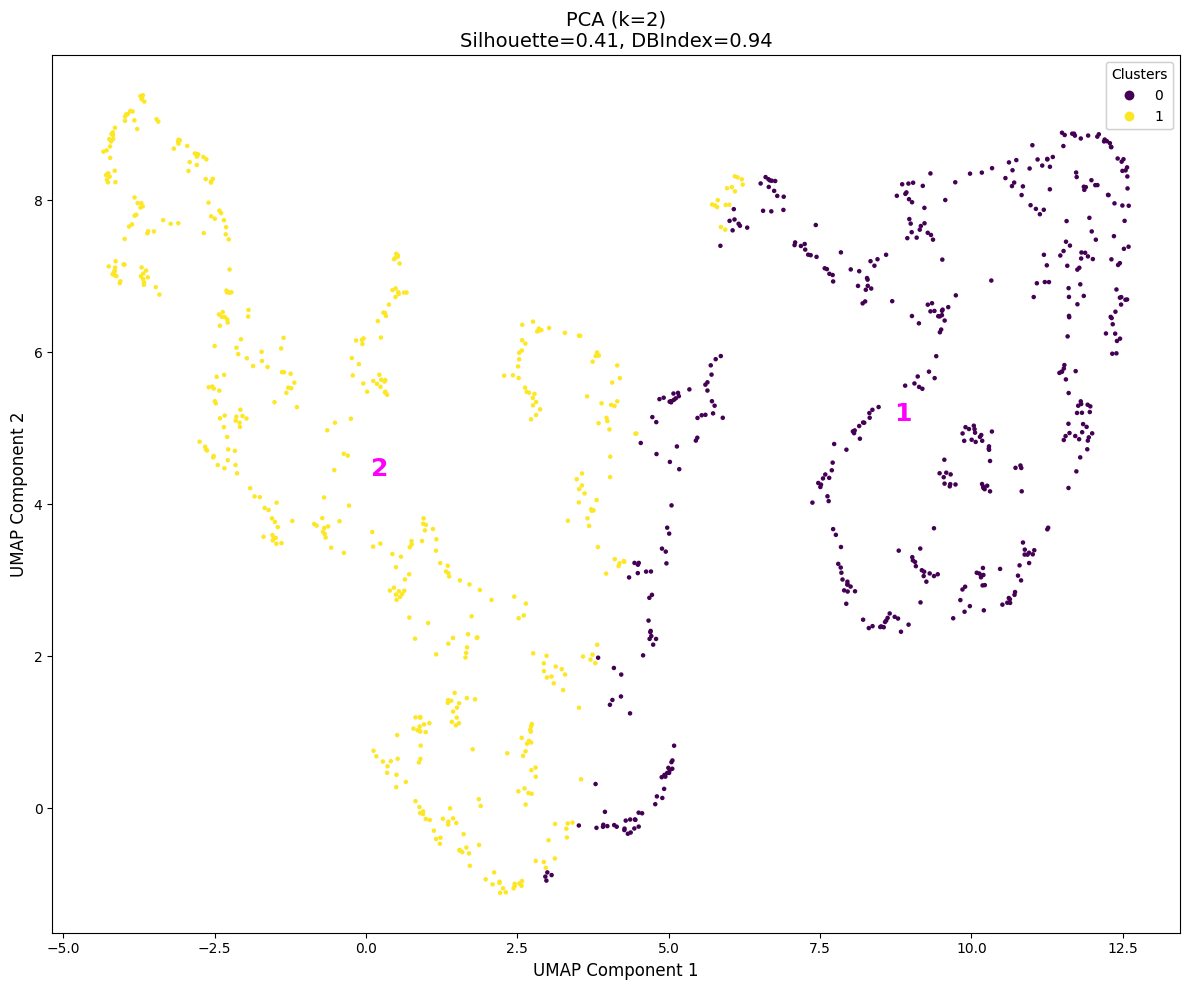

Plotting for n_components = 3...


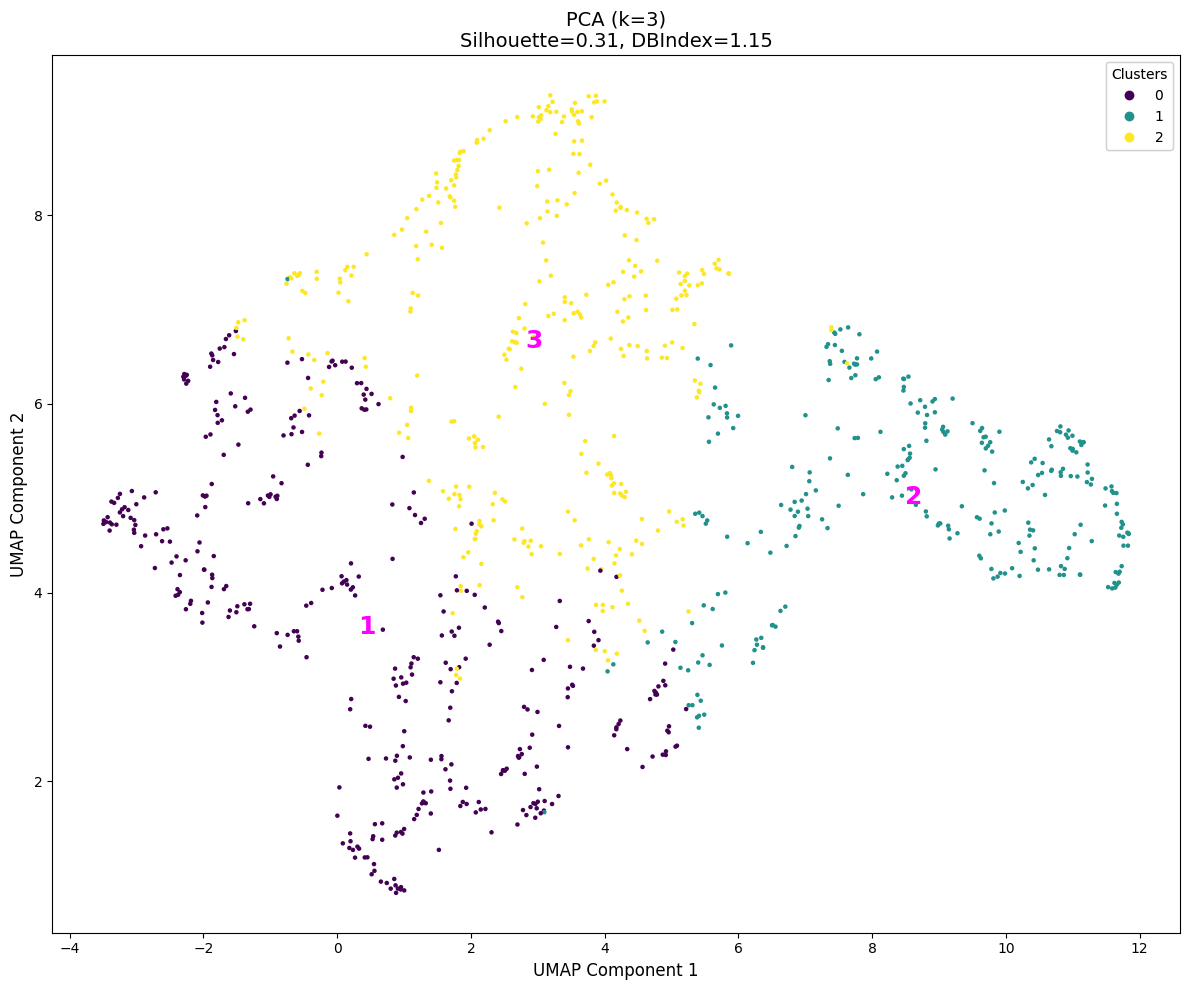

Plotting for n_components = 4...


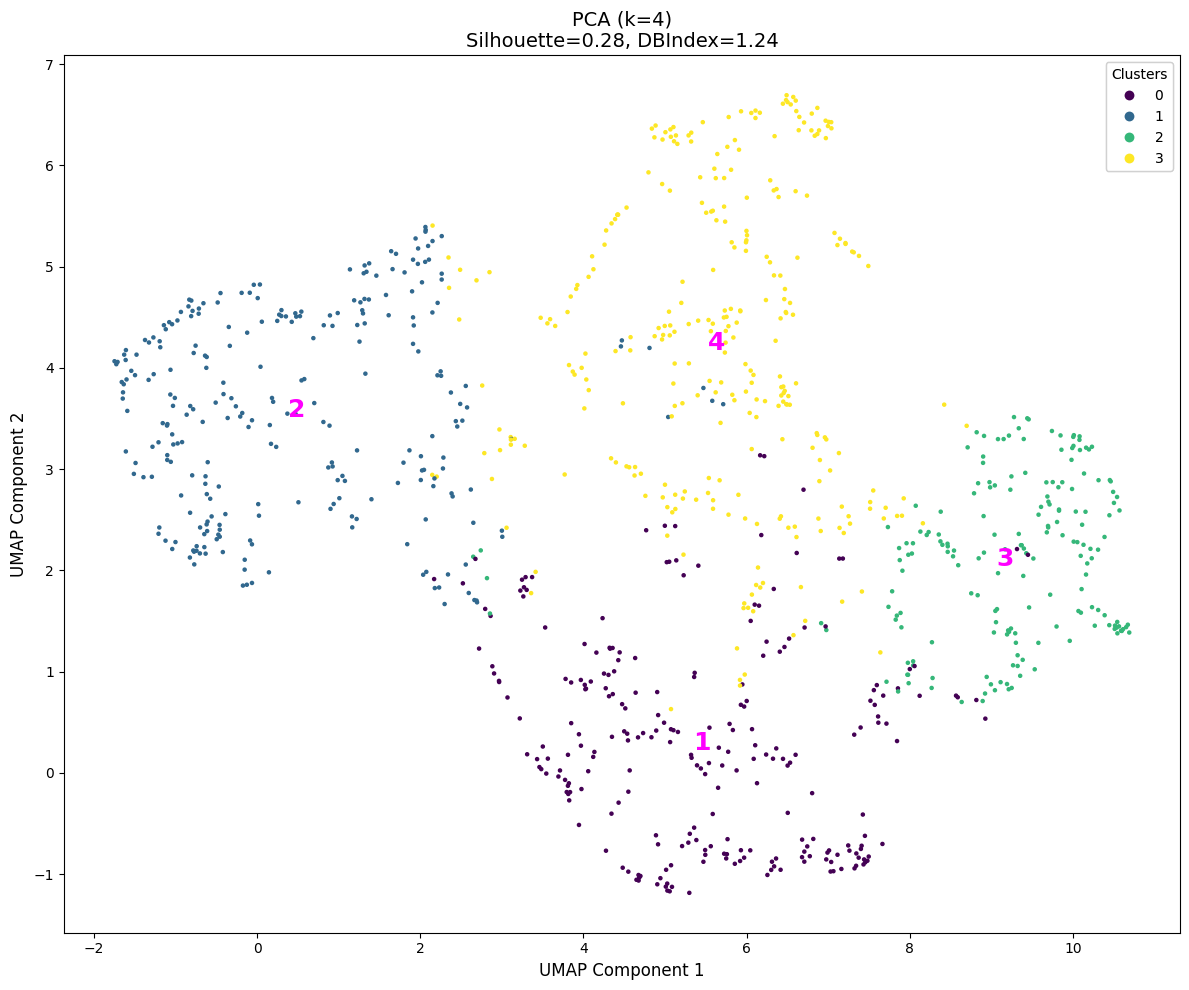

Plotting for n_components = 5...


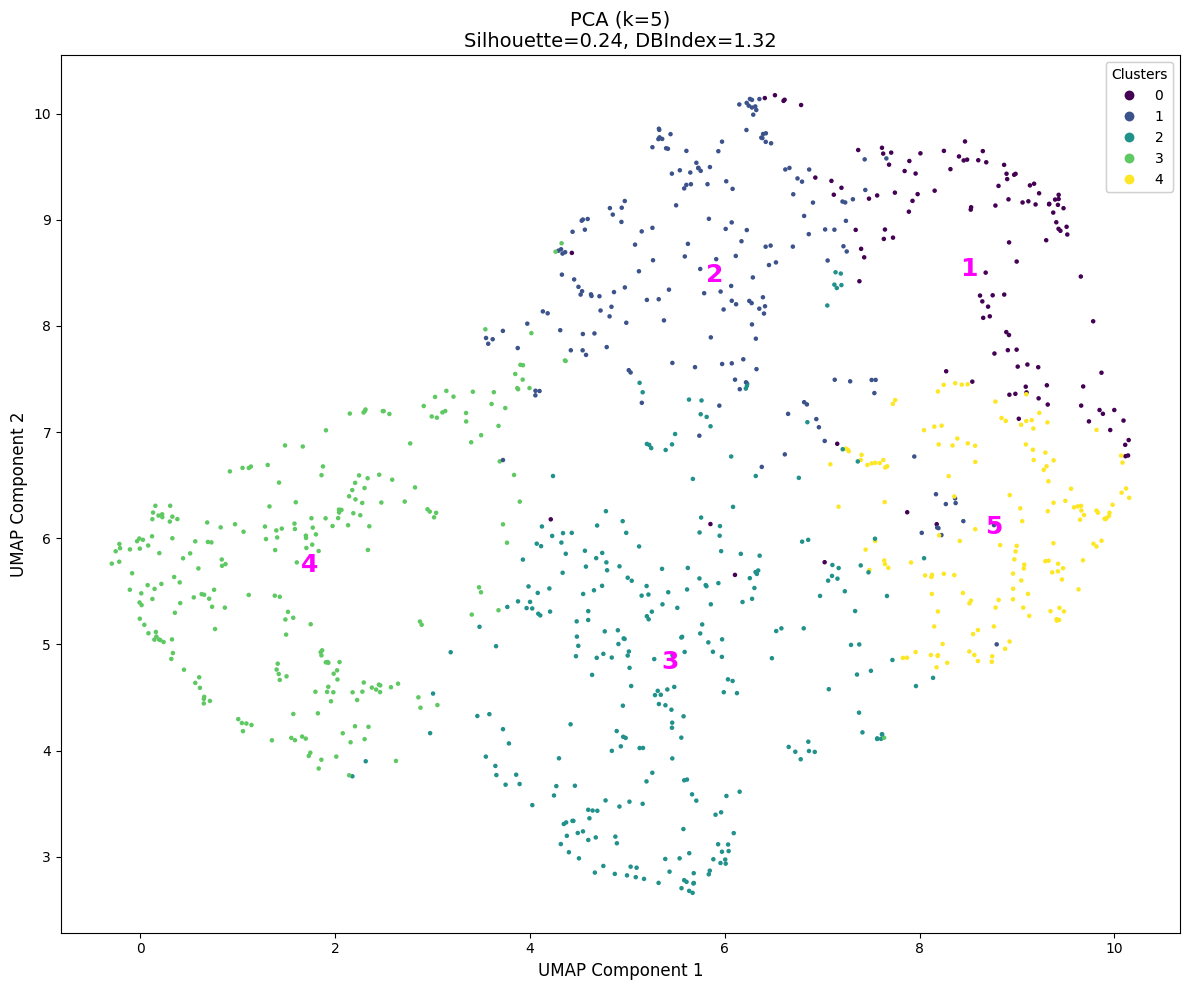

Plotting for n_components = 6...


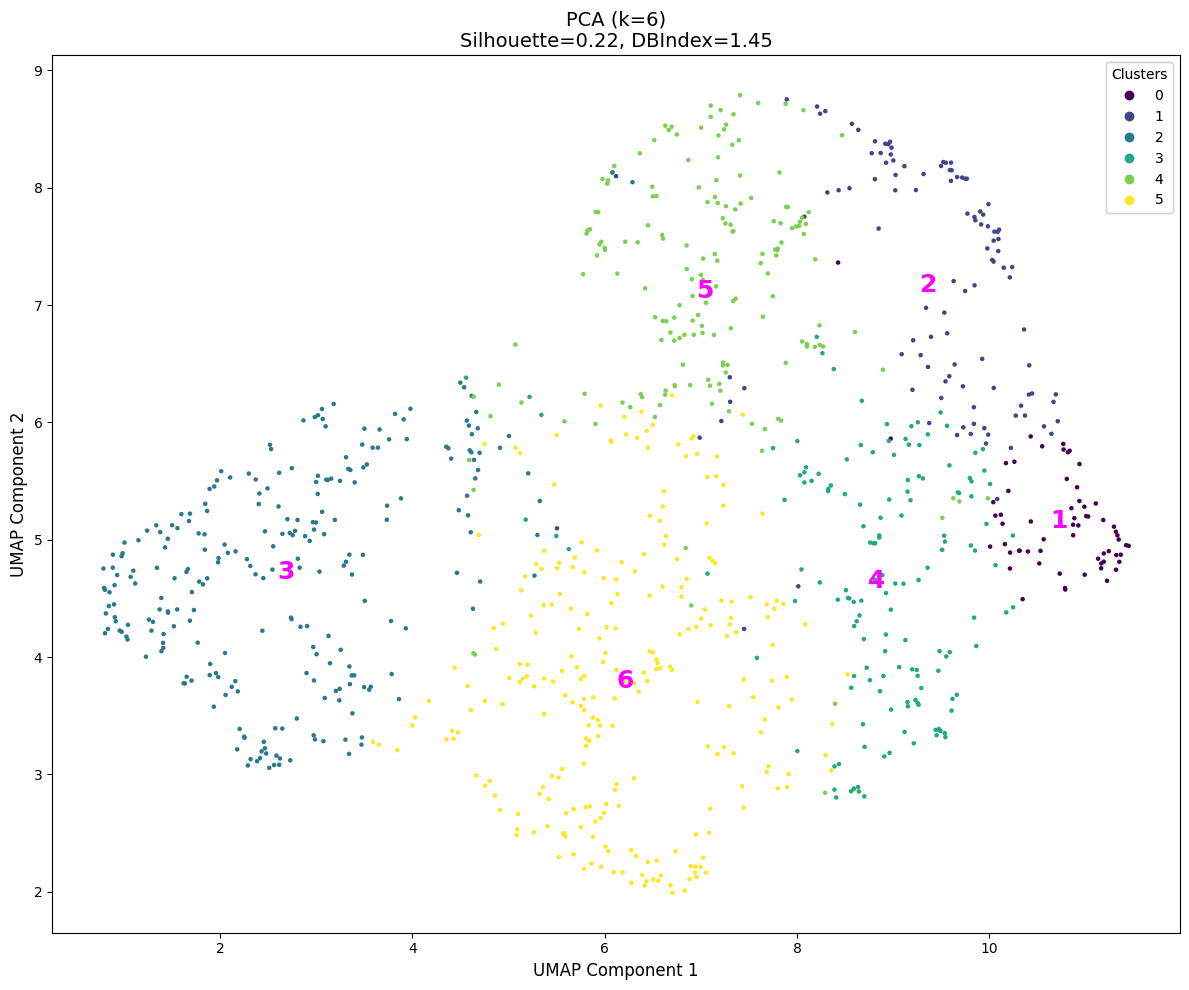

Plotting for n_components = 7...


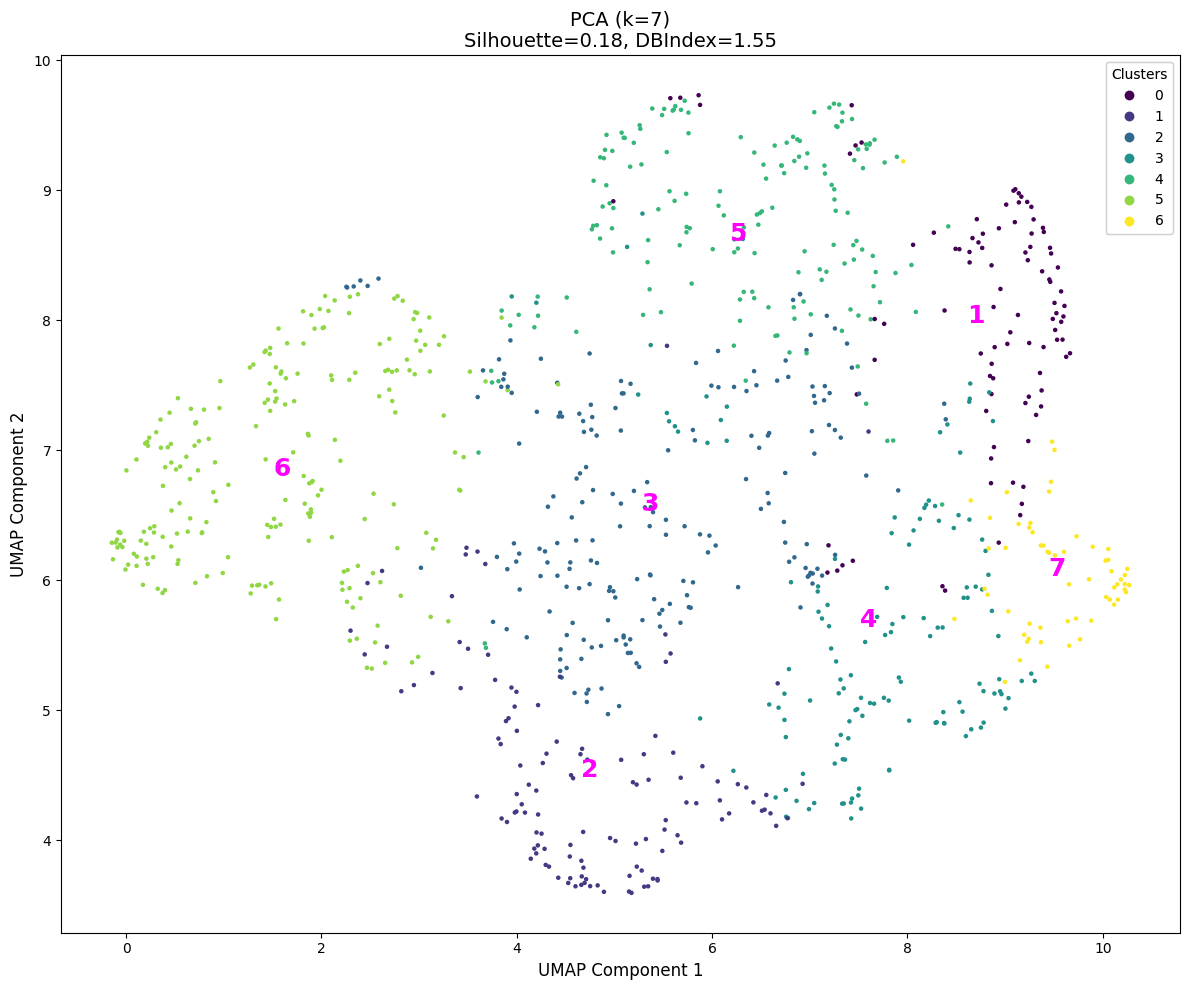

Plotting for n_components = 8...


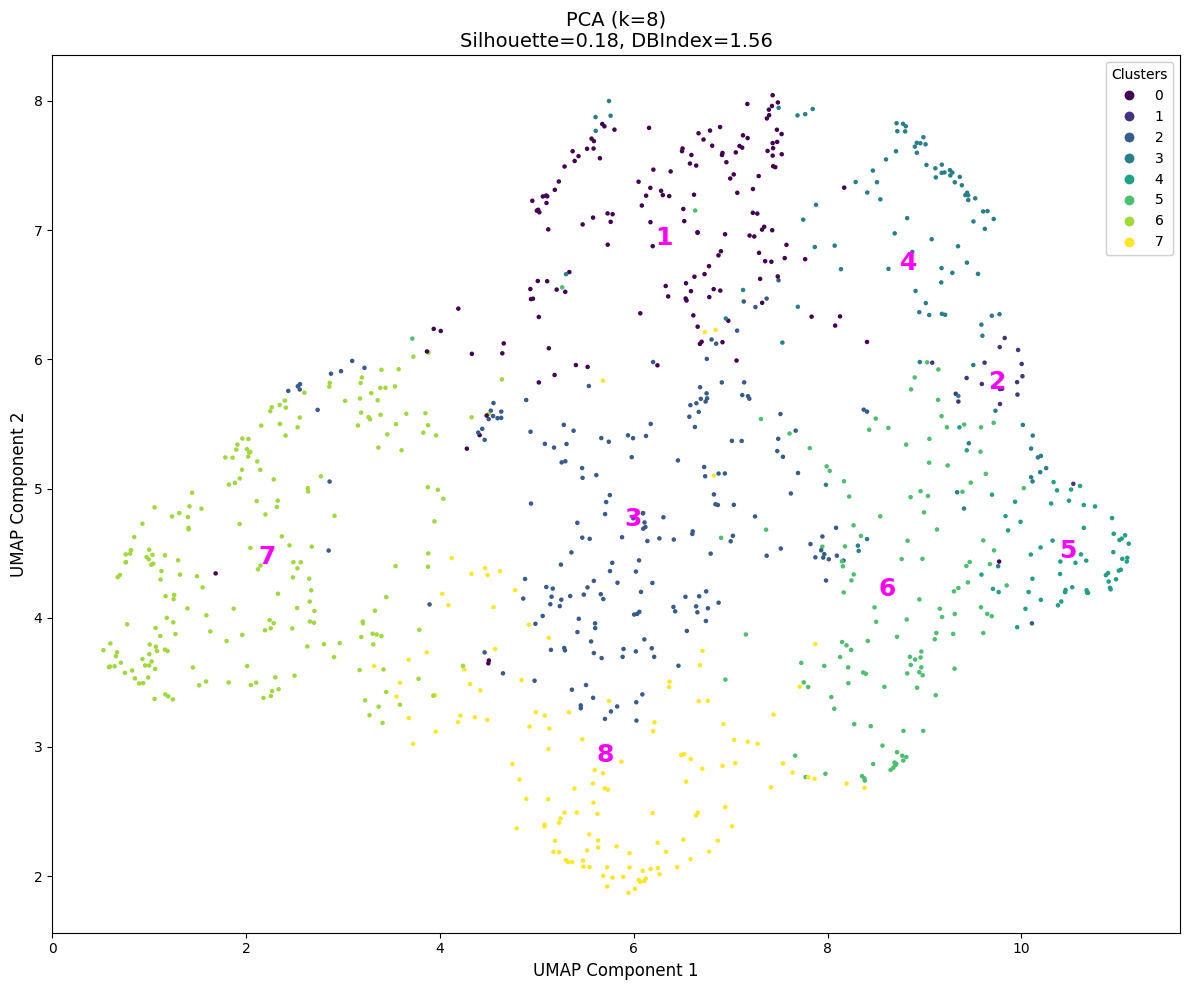

In [152]:
# Define the range of n_components to test
n_components_range = range(2,9)

# Loop over each n_components and visualize PCA and UMAP separately
for n_components in n_components_range:
    print(f"Plotting for n_components = {n_components}...")
    visualize_clusters(X, n_components=n_components, method='pca')
    # visualize_clusters(X, n_components=n_components, method='umap')


## Ridge Regress PCA of genes from PCA of feature vectors and measure MSE and Spearman rank correlation at that level, save fit as F

## Project from PCA of genes to genes and measure MSE and Spearman rank correlation at that level

## PCA of 18157 genes less the 460 genes

In [155]:
import scanpy as sc
scRNAseq = sc.read_h5ad('data/Crunch3_scRNAseq.h5ad')

In [158]:
filter_value_no_cancer = "n" # Filtered column value indicating absence of cancer
filter_value_cancer = "y" # Filtered column value indicating the presence of cancer
filter_column_scRNAseq = "dysplasia"

In [160]:
# Filter scRNAseq data by dysplasia status
scRNAseq_no_cancer = scRNAseq[scRNAseq.obs[filter_column_scRNAseq] == filter_value_no_cancer].copy()
scRNAseq_cancer = scRNAseq[scRNAseq.obs[filter_column_scRNAseq] == filter_value_cancer].copy()

In [161]:
scRNAseq_no_cancer

AnnData object with n_obs × n_vars = 45482 × 18615
    obs: 'annotation', 'individual', 'status', 'dysplasia'
    layers: 'counts'

In [162]:
name_data = 'UC9_I'

In [164]:
# Get the 18615 genes to rank
gene_18615_list = list(scRNAseq.var.index)

In [166]:
gene_460 = genes

In [167]:
common_genes = [g for g in gene_460 if g in gene_18615_list]
print("Number of shared genes between scRNA-seq and xenium data:", len(common_genes))

Number of shared genes between scRNA-seq and xenium data: 458


In [168]:
unmeasured_genes = [gene for gene in gene_18615_list if gene not in common_genes]
print("Number of unmeasured genes in Xenium data:", len(unmeasured_genes), "\n")

Number of unmeasured genes in Xenium data: 18157 



In [169]:
# scRNA-Seq data log1p-normalized with scale factor 10000 on 18615 genes
rna_data_norm_10000_unmeasured_genes = scRNAseq[:, unmeasured_genes].X.toarray()

In [171]:
rna_data_norm_10000_unmeasured_genes.shape

(201884, 18157)

In [173]:
from log1p_normalization_scale_factor import log1p_normalization_scale_factor

In [178]:
# scRNA-Seq data log1p-normalized with scale factor 100 on 460 genes
rna_data_norm_100_common_genes = log1p_normalization_scale_factor(scRNAseq[:, common_genes].layers["counts"].toarray(), scale_factor=100)

In [179]:
rna_data_norm_100_common_genes.shape

(201884, 458)

In [ ]:
print(f"Xenium data shape ({len(prediction_460_genes)} samples x {len(common_genes)} shared genes)")

scRNA-Seq data shape (201884 samples x 18615 shared genes + unmeasured genes)


NameError: name 'prediction_460_genes' is not defined

In [ ]:
# Similarity-Based Matching: Find the top_k most similar spots for each query
top_k = 30
print(f"\nCompute COSINE SIMILARITY: Find the top_k(={top_k}) similar scRNA-Seq cells for each Xenium cell...\n")
matches, similarities = find_matches_cos_similarity(rna_data_norm_100_common_genes, prediction_460_genes[common_genes].values, top_k=top_k)
del rna_data_norm_100_common_genes

# Weighted Averaging of scRNA-Seq data log1p-normalized with scale factor 10000
print("Compute WEIGHTED AVERAGE of unmeasured genes from scRNA-Seq based on similarity scores...")
weighted_avg_df_10000 = pd.DataFrame([
    {
        **dict(zip(unmeasured_genes, np.average(rna_data_norm_10000_unmeasured_genes[indices, :], axis=0, weights=similarity).round(2)))  # updated
    }
    for i, (indices, similarity) in enumerate(zip(matches, similarities))
])
weighted_avg_df_10000.index = prediction_460_genes.index

# Free memory by deleting large variables and performing garbage collection
del rna_data_norm_10000_unmeasured_genes, matches, similarities

prediction_18615_genes = pd.concat([prediction_460_genes, weighted_avg_df_10000], axis=1)[gene_18615_list]

print(f"\n-- {name_data} PREDICTION DONE --\n")

## Ridge Regress 18K gene PCA from 460 gene PCA and measure MSE and Spearman rank correlation at that level, save fit as G

## Project from 18K gene PCA to 18K genes and measure MSE and Spearman rank correlation at that level

## Apply F to features of sample image to get PCA of genes

## Apply G to F(sample) to get 18K genes PCA of sample image

## Do log fold change of H = G(F(sample)) for H[dysplasia] versus H[non-dysplasia]